<center> <h1> <span style='color:#292D78'> CREWES Data Science Training </span> </h1> </center>

<center> <h2> <span style='color:#DF7F00'> Sales Data Analysis </span> </h2> </center>

---

In this [Jupyter Notebook](https://jupyter.org/install) we will analyze [sales data](https://www.kaggle.com/datasets/manjeetsingh/retaildataset?datasetId=2296&language=Python&select=Features+data+set.csv) of different retail stores.

# Sales Analysis

### Context

The Challenge - One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – the challenge is to predict which departments will be affected and to what extent.

### Content

You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

There are 3 csv files:

#### Stores

Anonymized information about the 45 stores, indicating the type and size of store

#### Features

Contains additional data related to the store, department, and regional activity for the given dates.

* **Store** - the store number
* **Date** - the week
* **Temperature** - average temperature in the region
* **Fuel_Price** - cost of fuel in the region
* **MarkDown1-5** - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
* **CPI** - the consumer price index
* **Unemployment** - the unemployment rate
* **IsHoliday** - whether the week is a special holiday week

#### Sales

Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

* **Store** - the store number
* **Dept** - the department number
* **Date** - the week
* **Weekly_Sales** -  sales for the given department in the given store
* **IsHoliday** - whether the week is a special holiday week

Loading packages:

In [ ]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# print plots
%matplotlib inline 

# To supress warnings and deprecated messages
import warnings

warnings.filterwarnings("ignore")

In [ ]:
stores = pd.read_csv("stores.csv")
print(stores.shape)
stores.head()

(45, 3)


Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [ ]:
features = pd.read_csv("features.csv")
features

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05/02/2010        42.31       2.572        NaN        NaN   
1         1  12/02/2010        38.51       2.548        NaN        NaN   
2         1  19/02/2010        39.93       2.514        NaN        NaN   
3         1  26/02/2010        46.63       2.561        NaN        NaN   
4         1  05/03/2010        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  28/06/2013        76.05       3.639    4842.29     975.03   
8186     45  05/07/2013        77.50       3.614    9090.48    2268.58   
8187     45  12/07/2013        79.37       3.614    3789.94    1827.31   
8188     45  19/07/2013        82.84       3.737    2961.49    1047.07   
8189     45  26/07/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

In [ ]:
sales = pd.read_csv("sales.csv")
sales

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  05/02/2010      24924.50      False
1           1     1  12/02/2010      46039.49       True
2           1     1  19/02/2010      41595.55      False
3           1     1  26/02/2010      19403.54      False
4           1     1  05/03/2010      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  28/09/2012        508.37      False
421566     45    98  05/10/2012        628.10      False
421567     45    98  12/10/2012       1061.02      False
421568     45    98  19/10/2012        760.01      False
421569     45    98  26/10/2012       1076.80      False

[421570 rows x 5 columns]

In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


### Converting Object to Date

In [ ]:
features["Date"] = pd.to_datetime(features["Date"], format = "%d/%m/%Y")
sales["Date"] = pd.to_datetime(sales["Date"], format = "%d/%m/%Y")

In [ ]:
features.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN  211.350143         8.106      False

In [ ]:
sales.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


### Checking for duplicated rows

In [ ]:
stores.duplicated().sum()

0

In [ ]:
features.duplicated().sum()

0

In [ ]:
sales.duplicated().sum()

0

### Checking for missing values

In [ ]:
stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
features[features["CPI"].isna()]

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
169       1 2013-05-03        66.66       3.386    2298.63       2.00   
170       1 2013-05-10        63.90       3.392    4624.61      83.88   
171       1 2013-05-17        69.53       3.454   16170.50      92.00   
172       1 2013-05-24        77.19       3.494    7959.89     178.00   
173       1 2013-05-31        78.02       3.466    2369.77     142.45   
...     ...        ...          ...         ...        ...        ...   
8185     45 2013-06-28        76.05       3.639    4842.29     975.03   
8186     45 2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45 2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45 2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45 2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5  CPI  Unemployment  IsHoliday  
169      129.90      55.46    1301.04  NaN           NaN      False  
170       42.38    1618.31    8144.90  NaN           NaN      False  
171        8.32    4127.24    6206.97  NaN           NaN      False  
172     1621.47    3152.57    2938.70  NaN           NaN      False  
173      475.35      45.55    2056.84  NaN           NaN      False  
...         ...        ...        ...  ...           ...        ...  
8185       3.00    2449.97    3169.69  NaN           NaN      False  
8186     582.74    5797.47    1514.93  NaN           NaN      False  
8187      85.72     744.84    2150.36  NaN           NaN      False  
8188     204.19     363.00    1059.46  NaN           NaN      False  
8189       2.06      10.88    1864.57  NaN           NaN      False  

[585 rows x 12 columns]

In [ ]:
features[features["CPI"].isna()][["Unemployment"]].isna().sum()

Unemployment    585
dtype: int64

The NaN's for both columns occur at the same rolls. We will just replace the NaN's with the median of the columns.

In [ ]:
# The value for each column
values = {"CPI": features["CPI"].median(),
          "Unemployment" : features["Unemployment"].median(),
          "MarkDown1": -99999,
          "MarkDown2": -99999,
          "MarkDown3": -99999,
          "MarkDown4": -99999,
          "MarkDown5": -99999
         }

# Fill na and use inplace=True to overwrite the original dataframe
features.fillna(values, inplace = True)

In [ ]:
sales.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

### Statistical Description


#### Stores

In [ ]:
stores.describe().T # Statistics of numerical columns

count      mean           std      min      25%       50%       75%  \
Store   45.0      23.0     13.133926      1.0     12.0      23.0      34.0   
Size    45.0  130287.6  63825.271991  34875.0  70713.0  126512.0  202307.0   

            max  
Store      45.0  
Size   219622.0

* Mean and median (50%) are very silimar, suggesting a symmetric distribution.

In [ ]:
stores.describe(include = "object").T # Statistics of the categorical (object) column

count unique top freq
Type    45      3   A   22

In [ ]:
stores["Type"].value_counts() # Frequency of each class in column Type

A    22
B    17
C     6
Name: Type, dtype: int64

#### Features

In [ ]:
features.describe(include = "all").T # Numeric and categoric columns

count unique                  top  freq      first       last  \
Store         8190.0    NaN                  NaN   NaN        NaT        NaT   
Date            8190    182  2010-02-05 00:00:00    45 2010-02-05 2013-07-26   
Temperature   8190.0    NaN                  NaN   NaN        NaT        NaT   
Fuel_Price    8190.0    NaN                  NaN   NaN        NaT        NaT   
MarkDown1     8190.0    NaN                  NaN   NaN        NaT        NaT   
MarkDown2     8190.0    NaN                  NaN   NaN        NaT        NaT   
MarkDown3     8190.0    NaN                  NaN   NaN        NaT        NaT   
MarkDown4     8190.0    NaN                  NaN   NaN        NaT        NaT   
MarkDown5     8190.0    NaN                  NaN   NaN        NaT        NaT   
CPI           8190.0    NaN                  NaN   NaN        NaT        NaT   
Unemployment  8190.0    NaN                  NaN   NaN        NaT        NaT   
IsHoliday       8190      2                False  7605        NaT        NaT   

                      mean           std      min         25%         50%  \
Store                 23.0     12.987966      1.0        12.0        23.0   
Date                   NaN           NaN      NaN         NaN         NaN   
Temperature      59.356198     18.678607    -7.29     45.9025       60.71   
Fuel_Price        3.405992      0.431337    2.472       3.041       3.513   
MarkDown1    -47306.632352  53905.791592 -99999.0    -99999.0    -99999.0   
MarkDown2    -63126.929325  49802.355908 -99999.0    -99999.0    -99999.0   
MarkDown3    -55108.202814  51080.938228 -99999.0    -99999.0    -99999.0   
MarkDown4    -56311.177545  51223.061158 -99999.0    -99999.0    -99999.0   
MarkDown5     -48505.54133  52872.586078 -99999.0    -99999.0    -99999.0   
CPI             173.196752     38.384486  126.064  132.653774  182.764003   
Unemployment      7.825334      1.808971    3.684       6.833       7.806   
IsHoliday              NaN           NaN      NaN         NaN         NaN   

                     75%         max  
Store               34.0        45.0  
Date                 NaN         NaN  
Temperature        73.88      101.95  
Fuel_Price         3.743       4.468  
MarkDown1       4639.585   103184.98  
MarkDown2          98.59   104519.54  
MarkDown3          24.22   149483.31  
MarkDown4       774.6925    67474.85  
MarkDown5       2680.295    771448.1  
CPI           212.766994  228.976456  
Unemployment       8.519      14.313  
IsHoliday            NaN         NaN

* The data goes from 2010-02-05 to 2012-07-26
* All numerical columns seems to have symmetric distribution
* Around 92% of the data is not a holiday
* The MarkDown columns are dominated by the missing values.

#### Sales

In [ ]:
sales.describe(include = "all").T

count unique                  top    freq      first  \
Store         421570.0    NaN                  NaN     NaN        NaT   
Dept          421570.0    NaN                  NaN     NaN        NaT   
Date            421570    143  2011-12-23 00:00:00    3027 2010-02-05   
Weekly_Sales  421570.0    NaN                  NaN     NaN        NaT   
IsHoliday       421570      2                False  391909        NaT   

                   last          mean           std      min      25%  \
Store               NaT     22.200546     12.785297      1.0     11.0   
Dept                NaT     44.260317     30.492054      1.0     18.0   
Date         2012-10-26           NaN           NaN      NaN      NaN   
Weekly_Sales        NaT  15981.258123  22711.183519 -4988.94  2079.65   
IsHoliday           NaT           NaN           NaN      NaN      NaN   

                  50%         75%        max  
Store            22.0        33.0       45.0  
Dept             37.0        74.0       99.0  
Date              NaN         NaN        NaN  
Weekly_Sales  7612.03  20205.8525  693099.36  
IsHoliday         NaN         NaN        NaN

* Median of the weekly sales is smaller than the mean, suggesting a left skewed distribution
* There are negative sales.
* There is only one week day in the data. The columns we created has no importance for this analysis and we can drop it.

In [ ]:
sales[sales["Weekly_Sales"] < 0]

Store  Dept       Date  Weekly_Sales  IsHoliday
846         1     6 2012-08-10       -139.65      False
2384        1    18 2012-05-04         -1.27      False
6048        1    47 2010-02-19       -863.00      False
6049        1    47 2010-03-12       -698.00      False
6051        1    47 2010-10-08        -58.00      False
...       ...   ...        ...           ...        ...
419597     45    80 2010-02-12         -0.43       True
419598     45    80 2010-02-19         -0.27      False
419603     45    80 2010-04-16         -1.61      False
419614     45    80 2010-07-02         -0.27      False
419640     45    80 2011-02-11         -0.24       True

[1285 rows x 5 columns]

In [ ]:
sales["Weekly_Sales"].min()

-4988.94

Negative values in sales can be due to new items added to the inventory, payments, sales returns, etc.

## Merging Dataframes

In [ ]:
temp = pd.merge(sales, features.drop(columns = ["IsHoliday"]), how = "left", on = ["Store", "Date"])
temp

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     1 2010-02-12      46039.49       True        38.51   
2           1     1 2010-02-19      41595.55      False        39.93   
3           1     1 2010-02-26      19403.54      False        46.63   
4           1     1 2010-03-05      21827.90      False        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37      False        64.88   
421566     45    98 2012-10-05        628.10      False        64.89   
421567     45    98 2012-10-12       1061.02      False        54.47   
421568     45    98 2012-10-19        760.01      False        56.47   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
1            2.548  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
2            2.514  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
3            2.561  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
4            2.625  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
...            ...        ...        ...        ...        ...        ...   
421565       3.997    4556.61      20.64       1.50    1601.01    3288.25   
421566       3.985    5046.74  -99999.00      18.82    2253.43    2340.01   
421567       4.000    1956.28  -99999.00       7.89     599.32    3990.54   
421568       3.969    2004.02  -99999.00       3.18     437.73    1537.49   
421569       3.882    4018.91      58.08     100.00     211.94     858.33   

               CPI  Unemployment  
0       211.096358         8.106  
1       211.242170         8.106  
2       211.289143         8.106  
3       211.319643         8.106  
4       211.350143         8.106  
...            ...           ...  
421565  192.013558         8.684  
421566  192.170412         8.667  
421567  192.327265         8.667  
421568  192.330854         8.667  
421569  192.308899         8.667  

[421570 rows x 14 columns]

In [ ]:
data = pd.merge(temp, stores, how = "left", on = "Store")
data

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     1 2010-02-12      46039.49       True        38.51   
2           1     1 2010-02-19      41595.55      False        39.93   
3           1     1 2010-02-26      19403.54      False        46.63   
4           1     1 2010-03-05      21827.90      False        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37      False        64.88   
421566     45    98 2012-10-05        628.10      False        64.89   
421567     45    98 2012-10-12       1061.02      False        54.47   
421568     45    98 2012-10-19        760.01      False        56.47   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
1            2.548  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
2            2.514  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
3            2.561  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
4            2.625  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
...            ...        ...        ...        ...        ...        ...   
421565       3.997    4556.61      20.64       1.50    1601.01    3288.25   
421566       3.985    5046.74  -99999.00      18.82    2253.43    2340.01   
421567       4.000    1956.28  -99999.00       7.89     599.32    3990.54   
421568       3.969    2004.02  -99999.00       3.18     437.73    1537.49   
421569       3.882    4018.91      58.08     100.00     211.94     858.33   

               CPI  Unemployment Type    Size  
0       211.096358         8.106    A  151315  
1       211.242170         8.106    A  151315  
2       211.289143         8.106    A  151315  
3       211.319643         8.106    A  151315  
4       211.350143         8.106    A  151315  
...            ...           ...  ...     ...  
421565  192.013558         8.684    B  118221  
421566  192.170412         8.667    B  118221  
421567  192.327265         8.667    B  118221  
421568  192.330854         8.667    B  118221  
421569  192.308899         8.667    B  118221  

[421570 rows x 16 columns]

In [ ]:
data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe(include = "all").T

count unique                  top    freq      first  \
Store         421570.0    NaN                  NaN     NaN        NaT   
Dept          421570.0    NaN                  NaN     NaN        NaT   
Date            421570    143  2011-12-23 00:00:00    3027 2010-02-05   
Weekly_Sales  421570.0    NaN                  NaN     NaN        NaT   
IsHoliday       421570      2                False  391909        NaT   
Temperature   421570.0    NaN                  NaN     NaN        NaT   
Fuel_Price    421570.0    NaN                  NaN     NaN        NaT   
MarkDown1     421570.0    NaN                  NaN     NaN        NaT   
MarkDown2     421570.0    NaN                  NaN     NaN        NaT   
MarkDown3     421570.0    NaN                  NaN     NaN        NaT   
MarkDown4     421570.0    NaN                  NaN     NaN        NaT   
MarkDown5     421570.0    NaN                  NaN     NaN        NaT   
CPI           421570.0    NaN                  NaN     NaN        NaT   
Unemployment  421570.0    NaN                  NaN     NaN        NaT   
Type            421570      3                    A  215478        NaT   
Size          421570.0    NaN                  NaN     NaN        NaT   

                   last           mean           std      min         25%  \
Store               NaT      22.200546     12.785297      1.0        11.0   
Dept                NaT      44.260317     30.492054      1.0        18.0   
Date         2012-10-26            NaN           NaN      NaN         NaN   
Weekly_Sales        NaT   15981.258123  22711.183519 -4988.94     2079.65   
IsHoliday           NaT            NaN           NaN      NaN         NaN   
Temperature         NaT      60.090059     18.447931    -2.06       46.68   
Fuel_Price          NaT       3.361027      0.458515    2.472       2.933   
MarkDown1           NaT  -61666.464097  51635.094088 -99999.0    -99999.0   
MarkDown2           NaT  -72730.315044  45802.711733 -99999.0    -99999.0   
MarkDown3           NaT  -67012.082938  47834.331011 -99999.0    -99999.0   
MarkDown4           NaT  -66900.864215  48362.713766 -99999.0    -99999.0   
MarkDown5           NaT  -62415.624707  50324.351413 -99999.0    -99999.0   
CPI                 NaT     171.201947     39.159276  126.064  132.022667   
Unemployment        NaT       7.960289      1.863296    3.879       6.891   
Type                NaT            NaN           NaN      NaN         NaN   
Size                NaT  136727.915739  60980.583328  34875.0     93638.0   

                    50%         75%         max  
Store              22.0        33.0        45.0  
Dept               37.0        74.0        99.0  
Date                NaN         NaN         NaN  
Weekly_Sales    7612.03  20205.8525   693099.36  
IsHoliday           NaN         NaN         NaN  
Temperature       62.09       74.28      100.14  
Fuel_Price        3.452       3.738       4.468  
MarkDown1      -99999.0     2809.05    88646.76  
MarkDown2      -99999.0         2.2   104519.54  
MarkDown3      -99999.0        4.54   141630.61  
MarkDown4      -99999.0      425.29    67474.85  
MarkDown5      -99999.0     2168.04   108519.28  
CPI           182.31878  212.416993  227.232807  
Unemployment      7.866       8.572      14.313  
Type                NaN         NaN         NaN  
Size           140167.0    202505.0    219622.0

In [ ]:
del temp # deleting temp dataframe

# EDA

## Data Engineering (Augmentation)

In [ ]:
data["Year"] = data["Date"].dt.year.astype("category")
data["Month"] = data["Date"].dt.month.astype("category")
data["Day"] = data["Date"].dt.day_of_year.astype("category")
data["Week"] = data["Date"].dt.week.astype("category")

data

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     1 2010-02-12      46039.49       True        38.51   
2           1     1 2010-02-19      41595.55      False        39.93   
3           1     1 2010-02-26      19403.54      False        46.63   
4           1     1 2010-03-05      21827.90      False        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37      False        64.88   
421566     45    98 2012-10-05        628.10      False        64.89   
421567     45    98 2012-10-12       1061.02      False        54.47   
421568     45    98 2012-10-19        760.01      False        56.47   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
1            2.548  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
2            2.514  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
3            2.561  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
4            2.625  -99999.00  -99999.00  -99999.00  -99999.00  -99999.00   
...            ...        ...        ...        ...        ...        ...   
421565       3.997    4556.61      20.64       1.50    1601.01    3288.25   
421566       3.985    5046.74  -99999.00      18.82    2253.43    2340.01   
421567       4.000    1956.28  -99999.00       7.89     599.32    3990.54   
421568       3.969    2004.02  -99999.00       3.18     437.73    1537.49   
421569       3.882    4018.91      58.08     100.00     211.94     858.33   

               CPI  Unemployment Type    Size  Year Month  Day Week  
0       211.096358         8.106    A  151315  2010     2   36    5  
1       211.242170         8.106    A  151315  2010     2   43    6  
2       211.289143         8.106    A  151315  2010     2   50    7  
3       211.319643         8.106    A  151315  2010     2   57    8  
4       211.350143         8.106    A  151315  2010     3   64    9  
...            ...           ...  ...     ...   ...   ...  ...  ...  
421565  192.013558         8.684    B  118221  2012     9  272   39  
421566  192.170412         8.667    B  118221  2012    10  279   40  
421567  192.327265         8.667    B  118221  2012    10  286   41  
421568  192.330854         8.667    B  118221  2012    10  293   42  
421569  192.308899         8.667    B  118221  2012    10  300   43  

[421570 rows x 20 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

## Univariate Analysis

### Numeric Features

In [ ]:
def hist_box(data, feature, figsize=(12, 7)):

    # Subplot canvas
    fig, (ax_box, ax_hist) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios": (0.25, 0.75)}, figsize = figsize)

    # Boxplot on top
    sns.boxplot(data = data, x = feature, ax = ax_box, showmeans = True, color = "pink")  # boxplot will be created and a star will indicate the mean value of the column
    
    # Histogram on bottom
    sns.histplot(data = data, x = feature, ax = ax_hist) # histogram will be created and

    # Add mean and median to histogram
    ax_hist.axvline(data[feature].mean(), color = "green") # mean
    ax_hist.axvline(data[feature].median(), color = "orange") # median

    # Title
    fig.suptitle("Distribution of " + feature, fontsize=16)

In [ ]:
# Get numerical columns:
cols_num = list(data.drop(columns = ["Store", "Dept"]).select_dtypes(include = ["int64", "float64"]))

print(cols_num)

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']


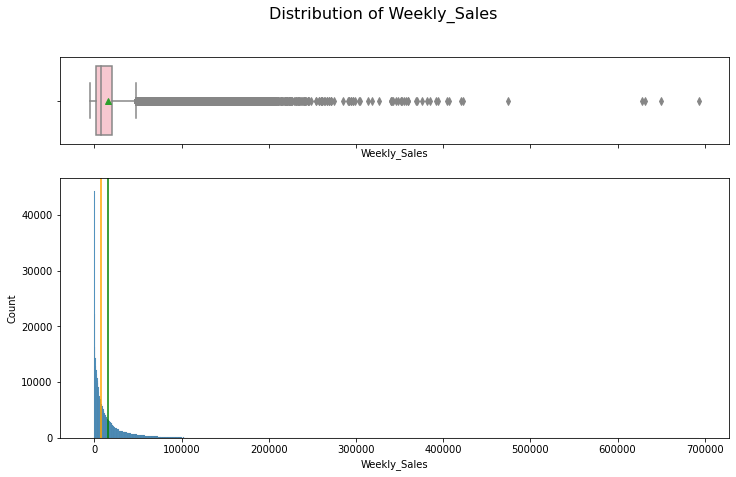

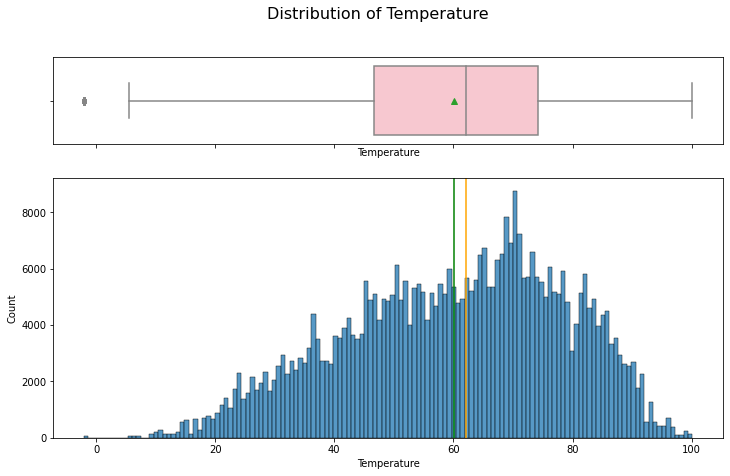

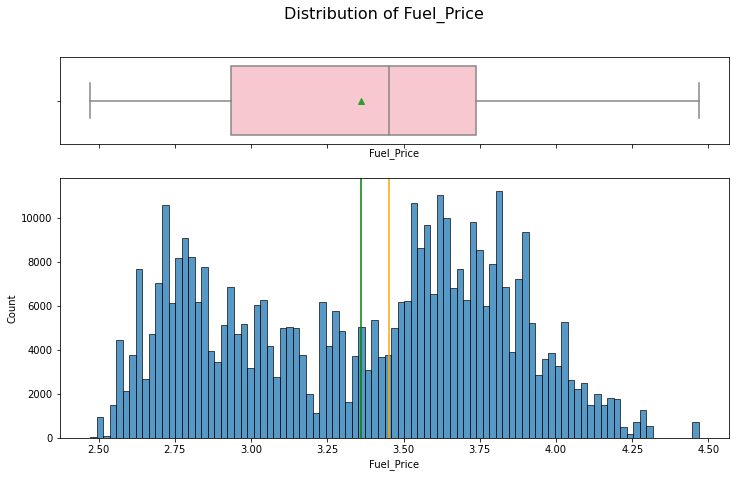

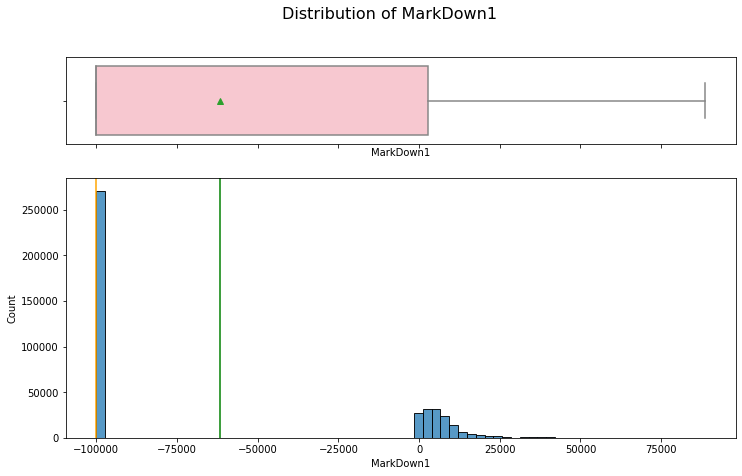

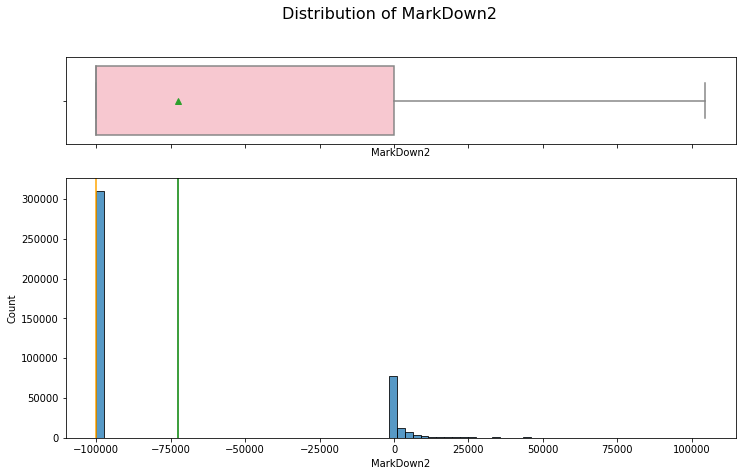

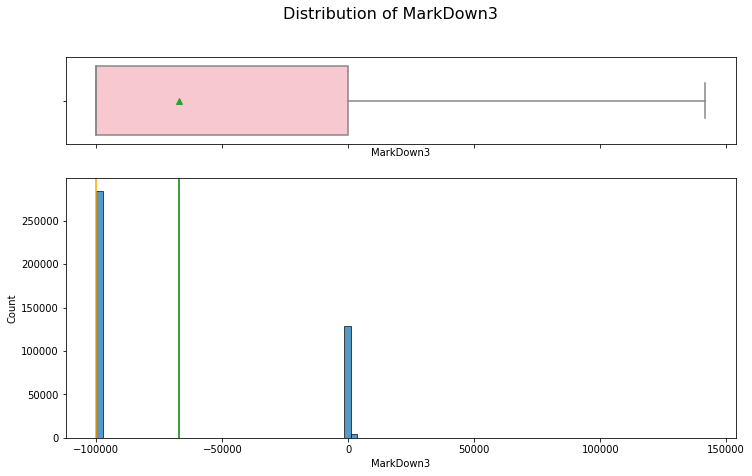

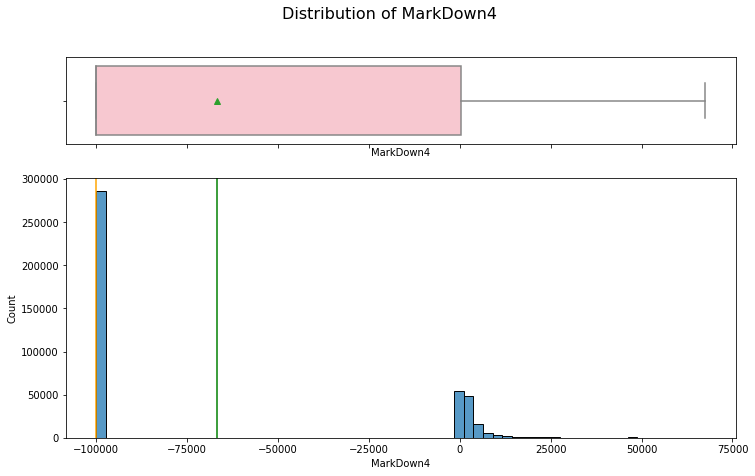

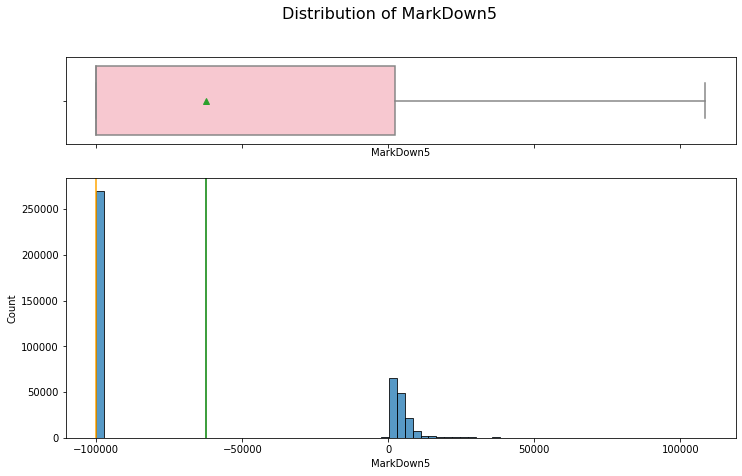

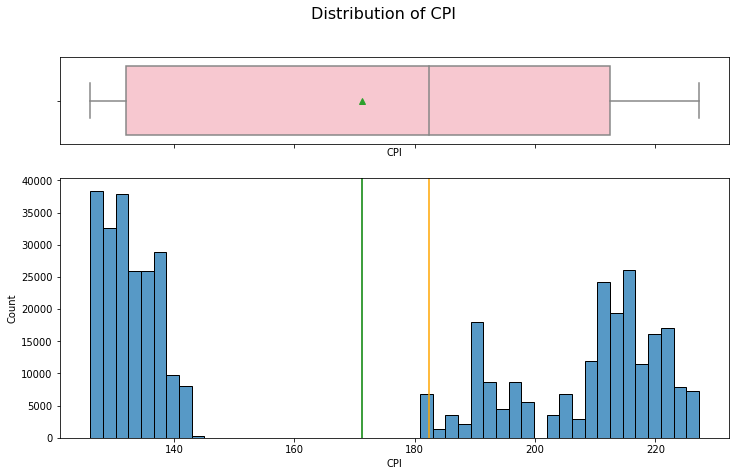

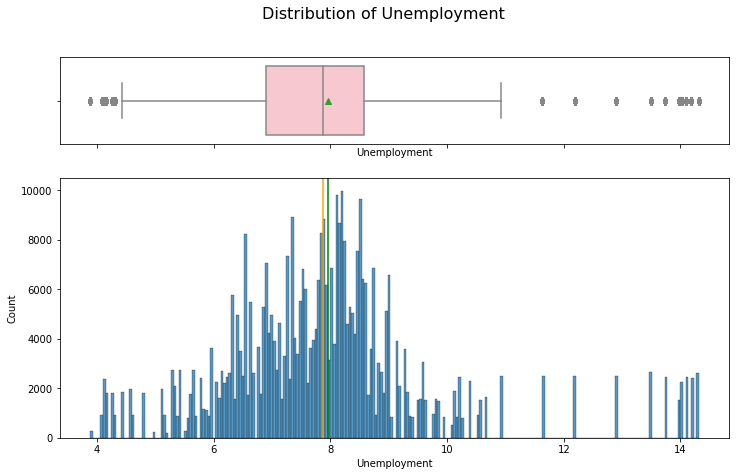

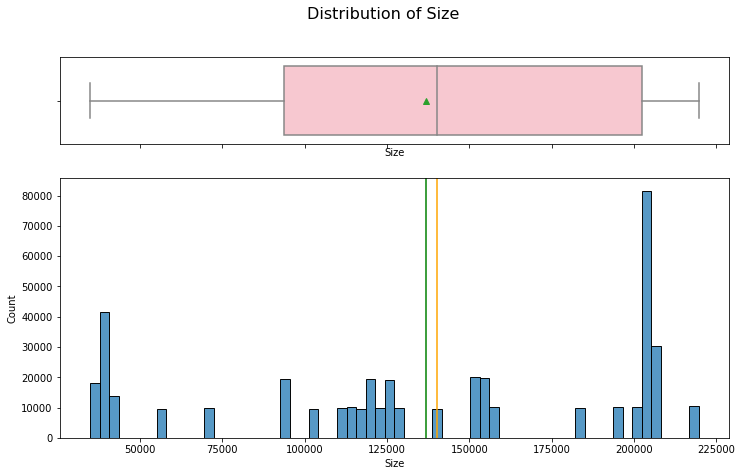

In [ ]:
for i in cols_num:
    hist_box(data, i)

* `Weekly_Sales` is right skewed - log transformation.
* All `Markdowns` are right skewed, and the added -99999 in place of the NaNs generated some strange behavior. 
* `Temperature` is slightly left skewed, with mead and average cole to $60^{o}F$.
* `Fuel Price` has two peaks, one at 2.75 and another at 3.7.
* `CPI` also seems to have more peaks.
* `Unemployment` has a distribution close to normal, with outliers in both sides.

### Categorical Features

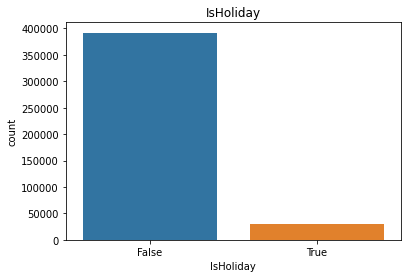

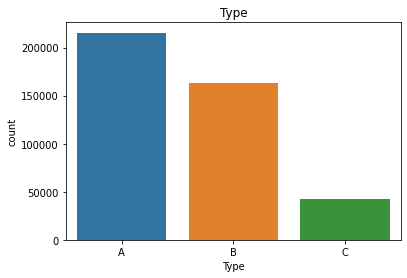

In [ ]:
cols_cat = ["IsHoliday", "Type"]

for i in cols_cat:
    sns.countplot(data = data, x = i);
    plt.title(i)
    plt.show()

* There are more regular days than holidays.
* The most common type of store is *A*, followed by *B*.

## Bivariate Analysis

### Numerical vs Store

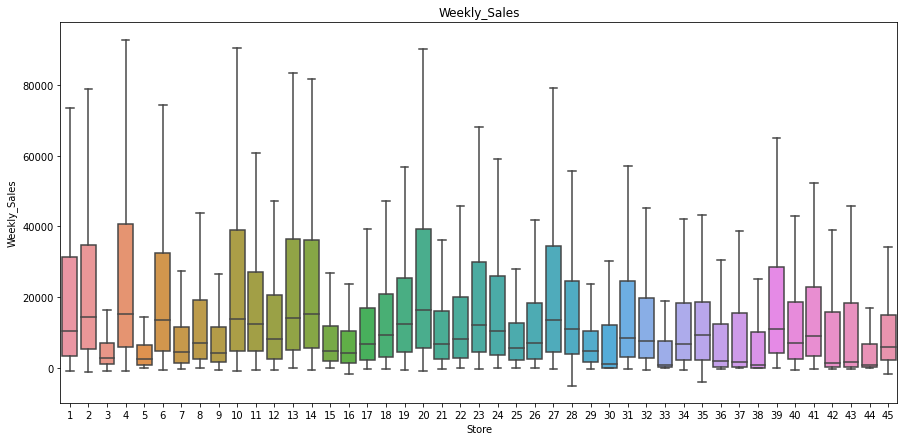

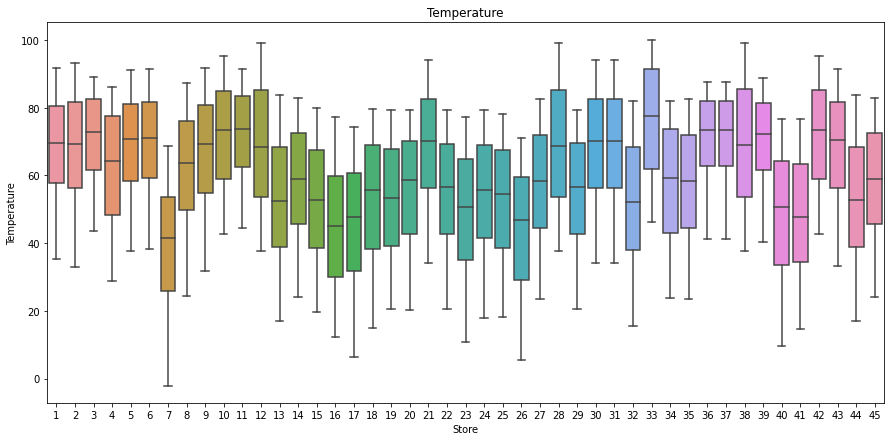

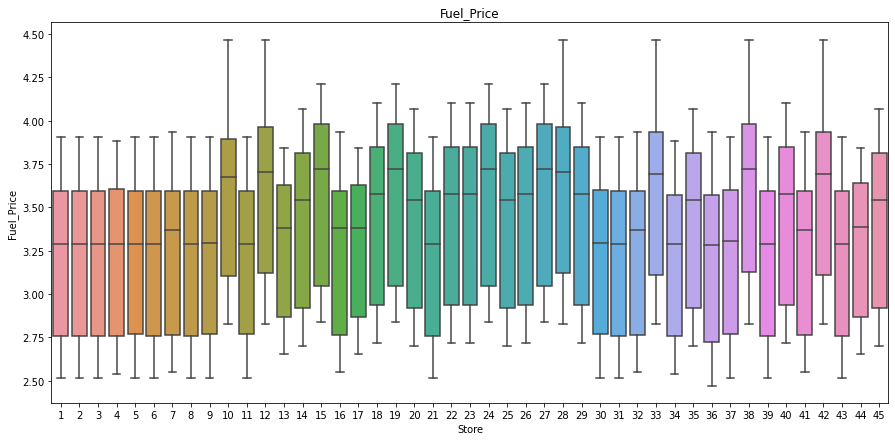

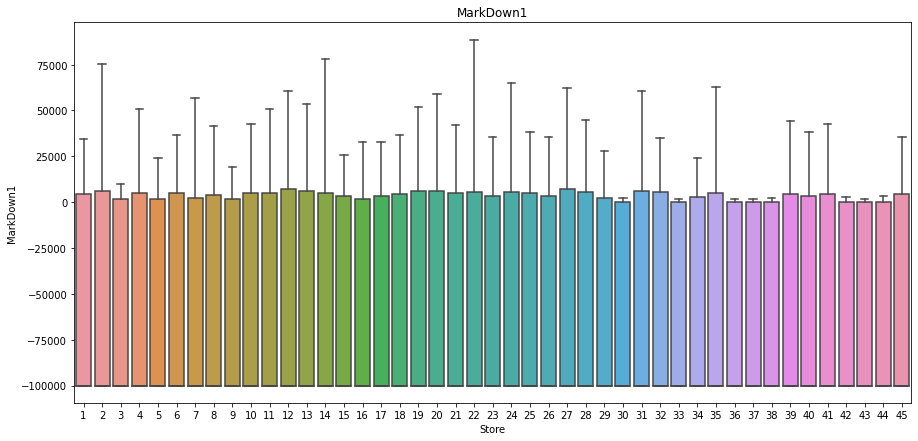

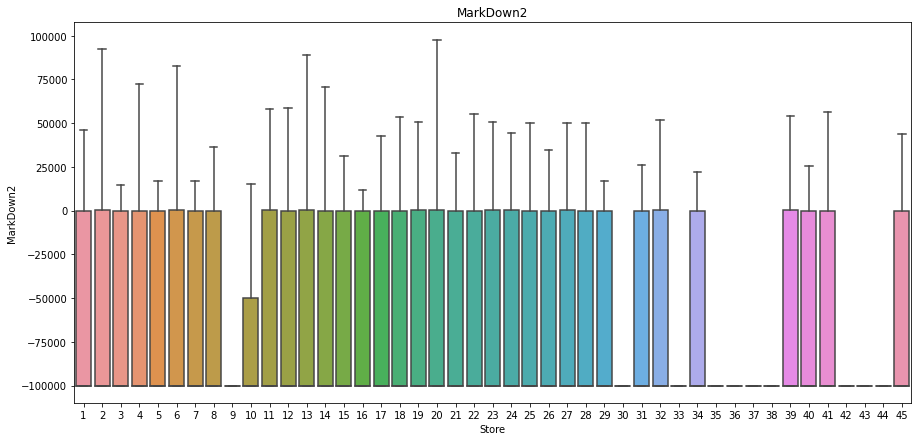

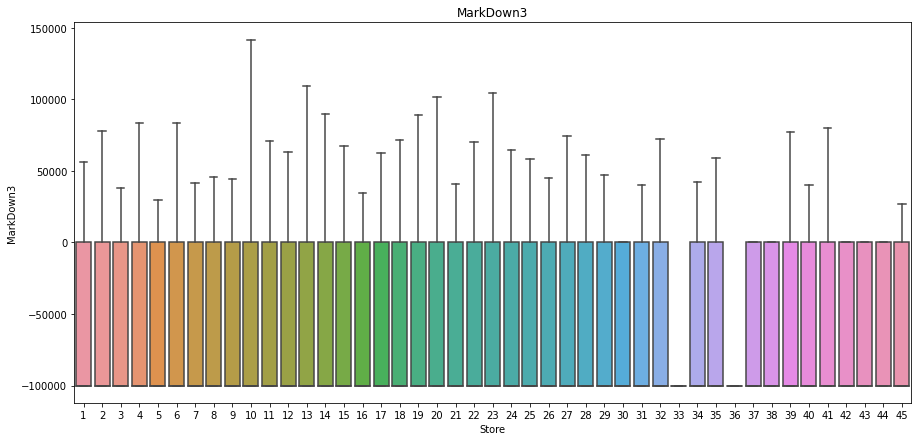

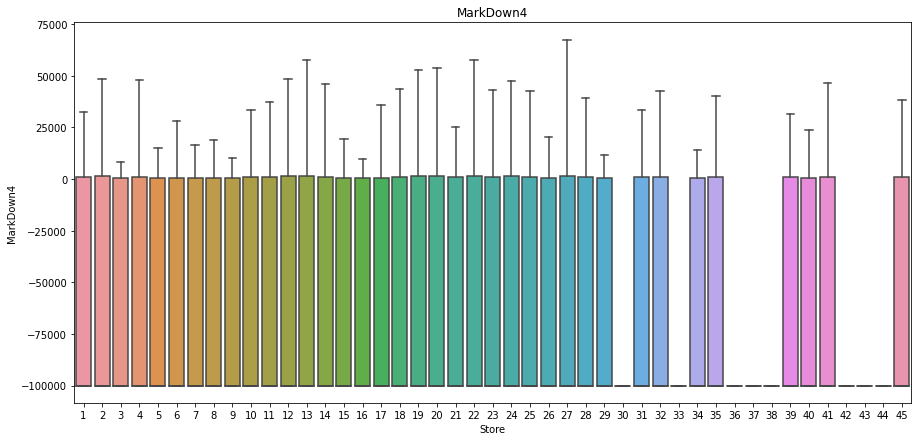

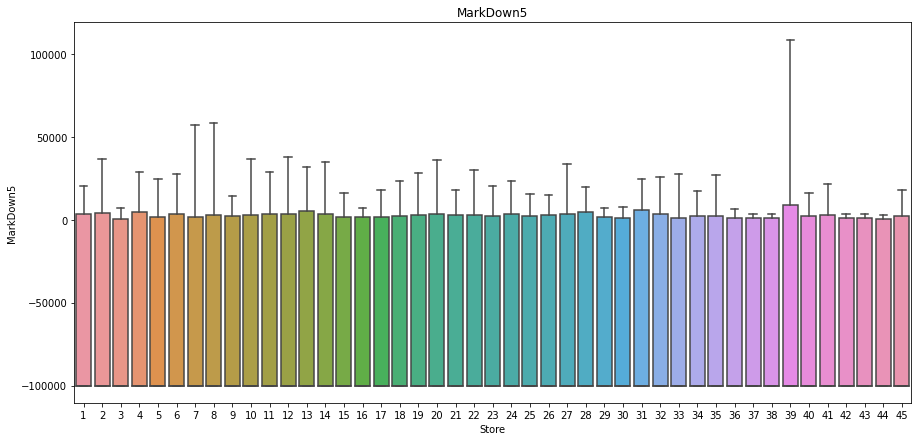

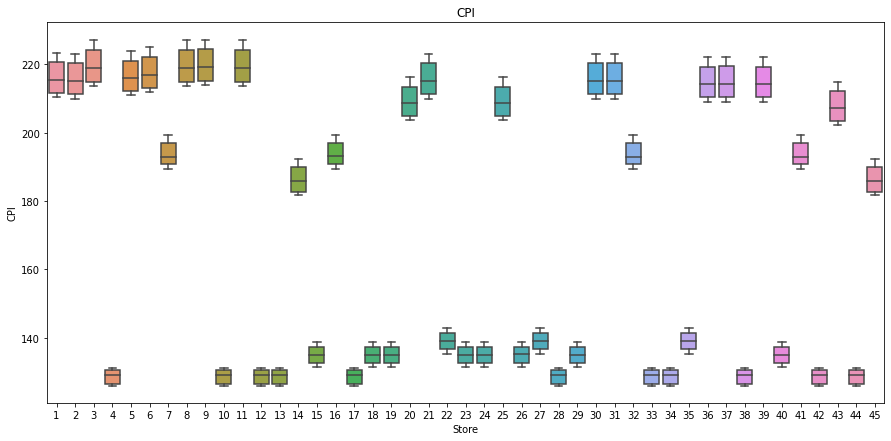

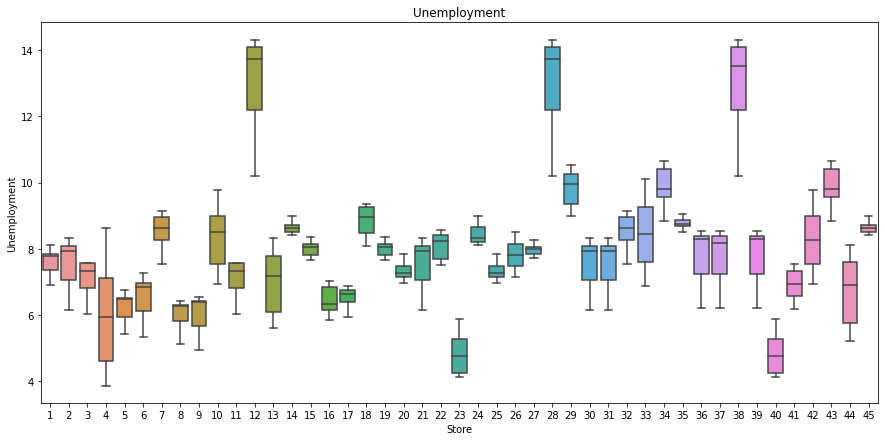

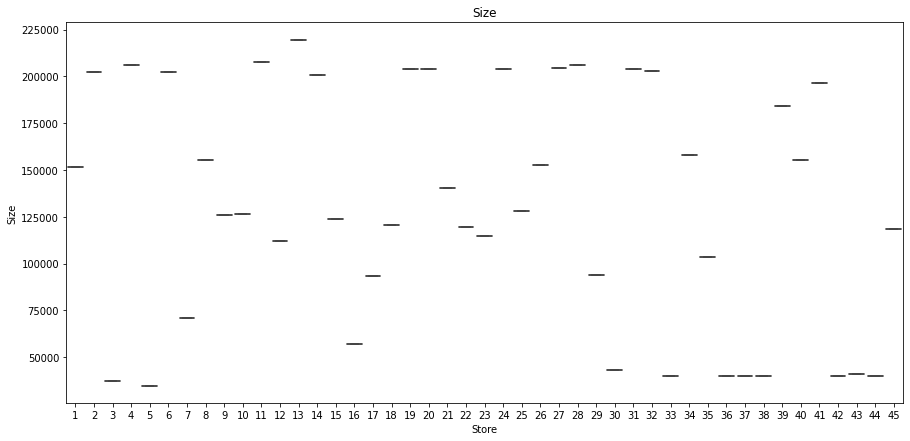

In [ ]:
for i in cols_num:
    plt.figure(figsize = (15, 7))
    sns.boxplot(data = data, x = "Store", y = i, showfliers = False)
    plt.title(i)
    plt.show()

* `Weekly_Sales` varies from store to store. Is store size the cause?
* All `MarkDowns` have a strechted distribution due to the addition of -99999 in the place of NaNs. We can check their plots removing those missings.
* `Fuel_Price` has a median around 3.3 in most stores, but in others, the price is higher.
* There are, apparently, two classes of `CPI`, one above 180, and another below 140.
* `Unemployment` rate varies around 8% in most stores locations, but for the stores 12, 28, 38, it goes up to around 14%, and for the stores 23 and 40 it varies around 5%.


In [ ]:
data_filtered = data.copy()

data_filtered.replace(-99999, np.nan, inplace = True)
data_filtered

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     1 2010-02-12      46039.49       True        38.51   
2           1     1 2010-02-19      41595.55      False        39.93   
3           1     1 2010-02-26      19403.54      False        46.63   
4           1     1 2010-03-05      21827.90      False        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37      False        64.88   
421566     45    98 2012-10-05        628.10      False        64.89   
421567     45    98 2012-10-12       1061.02      False        54.47   
421568     45    98 2012-10-19        760.01      False        56.47   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN        NaN        NaN        NaN   
1            2.548        NaN        NaN        NaN        NaN        NaN   
2            2.514        NaN        NaN        NaN        NaN        NaN   
3            2.561        NaN        NaN        NaN        NaN        NaN   
4            2.625        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
421565       3.997    4556.61      20.64       1.50    1601.01    3288.25   
421566       3.985    5046.74        NaN      18.82    2253.43    2340.01   
421567       4.000    1956.28        NaN       7.89     599.32    3990.54   
421568       3.969    2004.02        NaN       3.18     437.73    1537.49   
421569       3.882    4018.91      58.08     100.00     211.94     858.33   

               CPI  Unemployment Type    Size  Year Month  Day Week  
0       211.096358         8.106    A  151315  2010     2   36    5  
1       211.242170         8.106    A  151315  2010     2   43    6  
2       211.289143         8.106    A  151315  2010     2   50    7  
3       211.319643         8.106    A  151315  2010     2   57    8  
4       211.350143         8.106    A  151315  2010     3   64    9  
...            ...           ...  ...     ...   ...   ...  ...  ...  
421565  192.013558         8.684    B  118221  2012     9  272   39  
421566  192.170412         8.667    B  118221  2012    10  279   40  
421567  192.327265         8.667    B  118221  2012    10  286   41  
421568  192.330854         8.667    B  118221  2012    10  293   42  
421569  192.308899         8.667    B  118221  2012    10  300   43  

[421570 rows x 20 columns]

In [ ]:
data_filtered.dropna(axis = 0, inplace = True)
data_filtered.reset_index(inplace = True)
data_filtered

index  Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0          92      1     1 2011-11-11      18689.54      False        59.11   
1          93      1     1 2011-11-18      19050.66      False        62.25   
2          94      1     1 2011-11-25      20911.25       True        60.14   
3          95      1     1 2011-12-02      25293.49      False        48.91   
4          96      1     1 2011-12-09      33305.92      False        43.93   
...       ...    ...   ...        ...           ...        ...          ...   
97051  421561     45    98 2012-08-31        346.04      False        75.09   
97052  421562     45    98 2012-09-07        352.44       True        75.70   
97053  421564     45    98 2012-09-21        467.30      False        65.32   
97054  421565     45    98 2012-09-28        508.37      False        64.88   
97055  421569     45    98 2012-10-26       1076.80      False        58.85   

       Fuel_Price  MarkDown1  MarkDown2  ...  MarkDown4  MarkDown5  \
0           3.297   10382.90    6115.67  ...    2406.62    6551.42   
1           3.308    6074.12     254.39  ...     427.39    5988.57   
2           3.236     410.31      98.00  ...       8.00     554.92   
3           3.172    5629.51      68.00  ...    2084.64   20475.32   
4           3.158    4640.65      19.00  ...    3639.42   14461.82   
...           ...        ...        ...  ...        ...        ...   
97051       3.867   23641.30       6.00  ...    6988.31    3992.13   
97052       3.911   11024.45      12.80  ...    1854.77    2055.70   
97053       4.038    8452.20      92.28  ...    2376.38    8670.40   
97054       3.997    4556.61      20.64  ...    1601.01    3288.25   
97055       3.882    4018.91      58.08  ...     211.94     858.33   

              CPI  Unemployment  Type    Size  Year Month  Day Week  
0      217.998085         7.866     A  151315  2011    11  315   45  
1      218.220509         7.866     A  151315  2011    11  322   46  
2      218.467621         7.866     A  151315  2011    11  329   47  
3      218.714733         7.866     A  151315  2011    12  336   48  
4      218.961846         7.866     A  151315  2011    12  343   49  
...           ...           ...   ...     ...   ...   ...  ...  ...  
97051  191.461281         8.684     B  118221  2012     8  244   35  
97052  191.577676         8.684     B  118221  2012     9  251   36  
97053  191.856704         8.684     B  118221  2012     9  265   38  
97054  192.013558         8.684     B  118221  2012     9  272   39  
97055  192.308899         8.667     B  118221  2012    10  300   43  

[97056 rows x 21 columns]

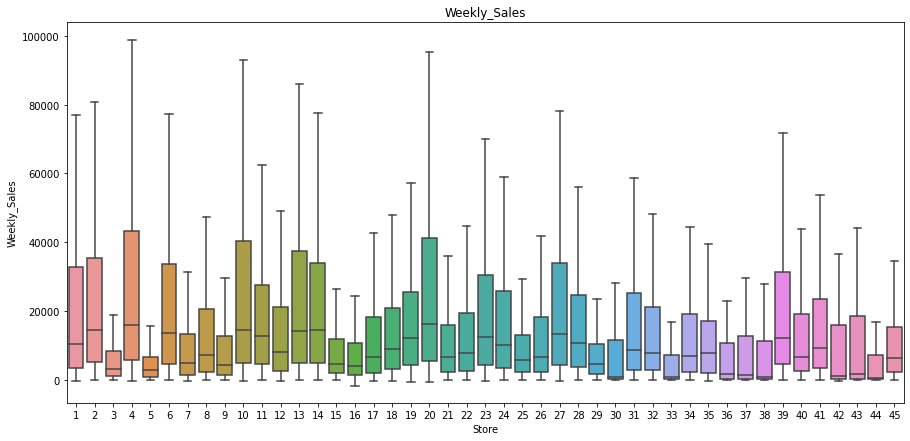

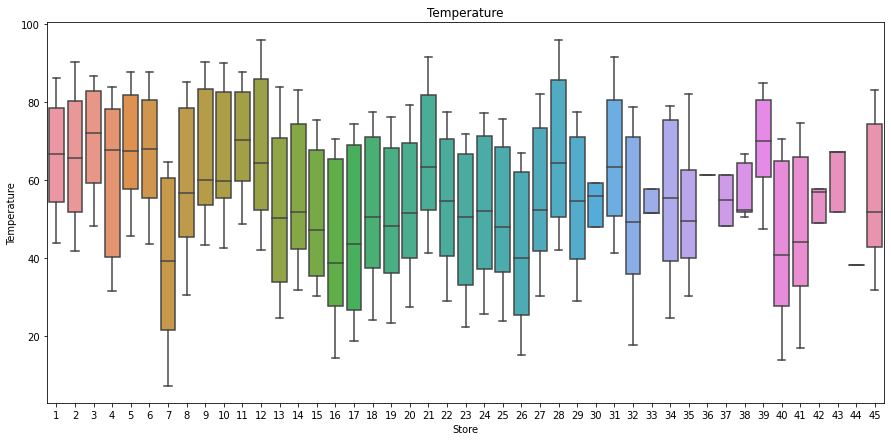

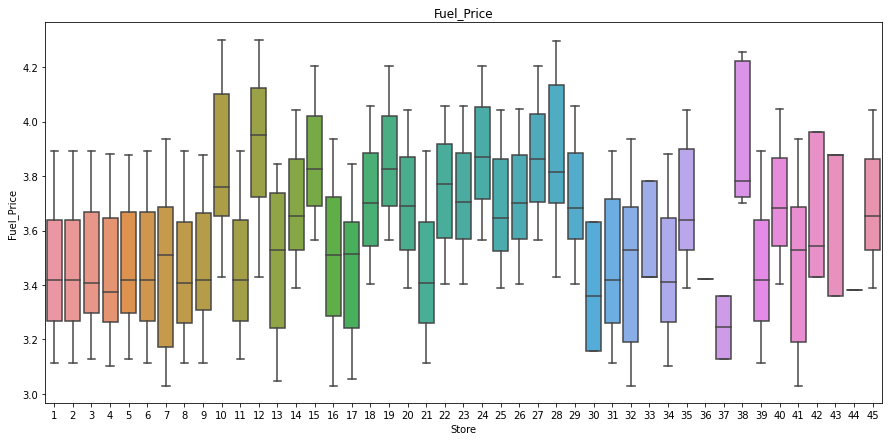

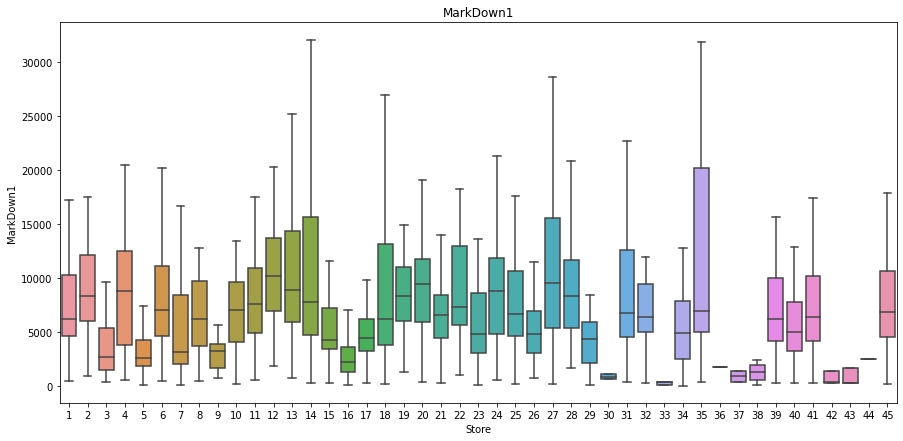

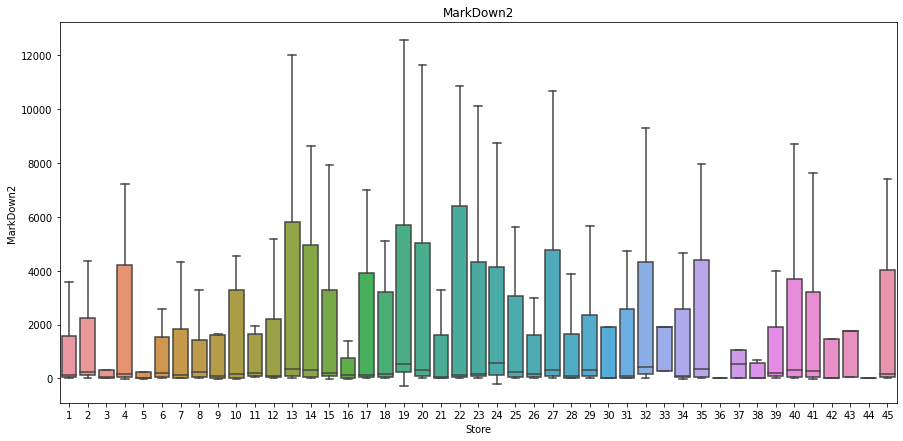

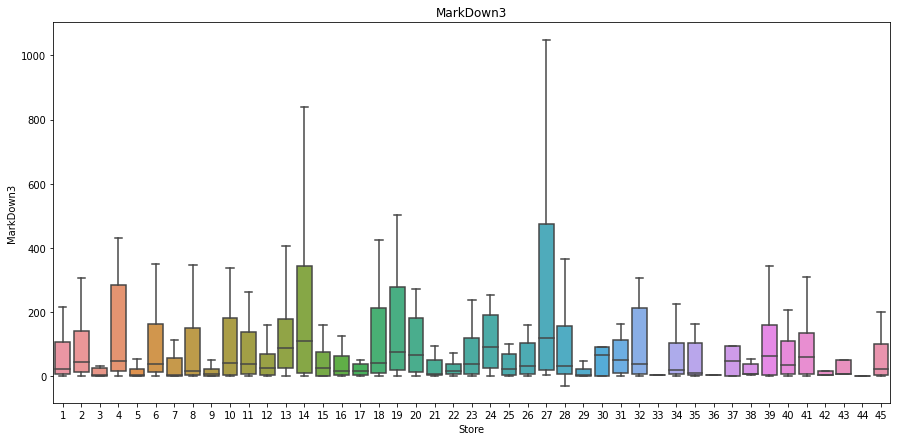

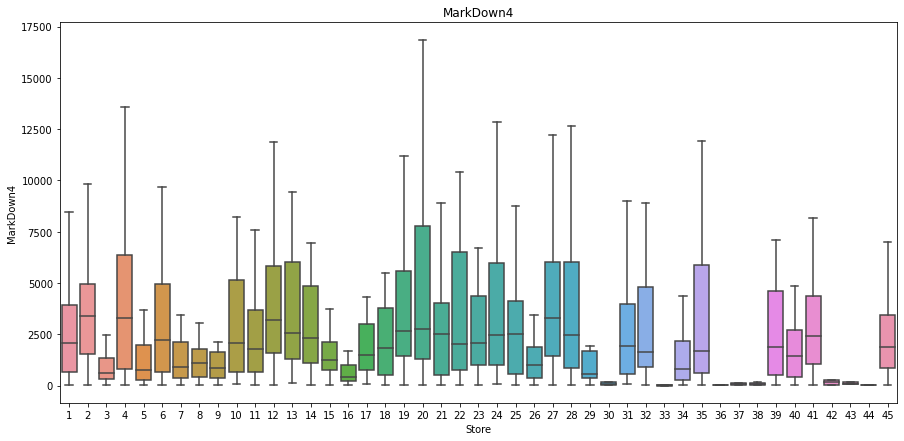

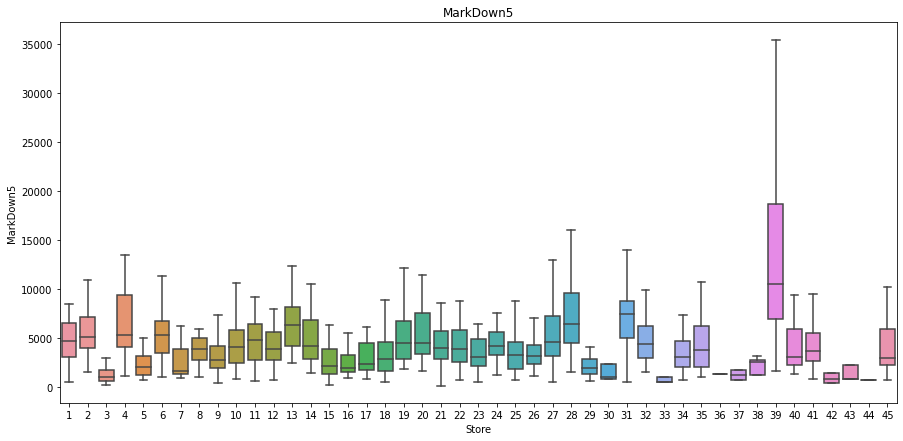

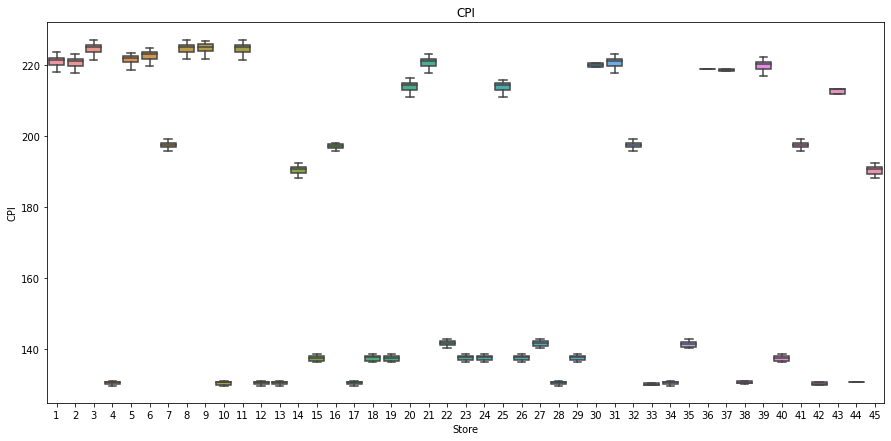

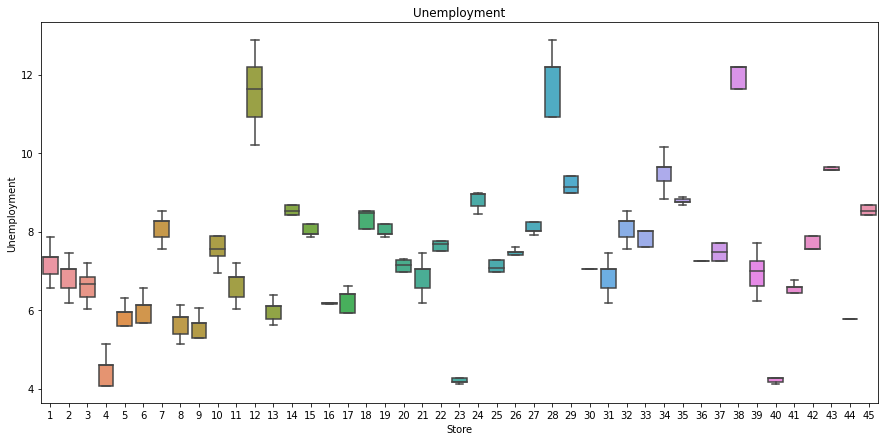

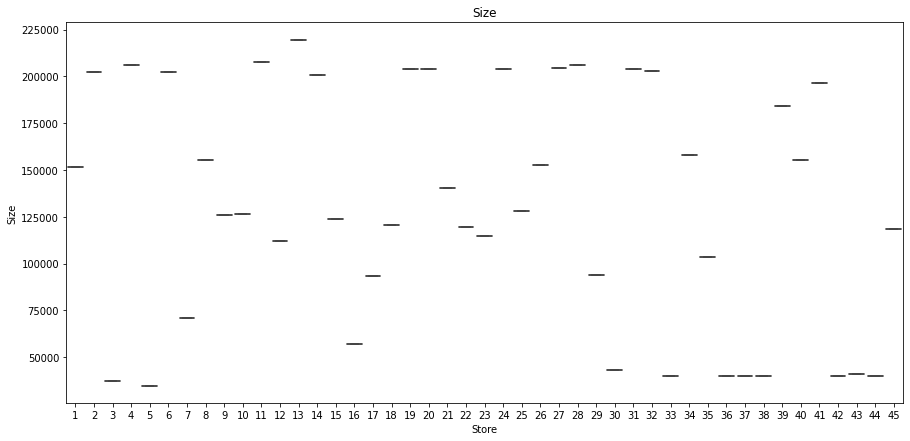

In [ ]:
for i in cols_num:
    plt.figure(figsize = (15, 7))
    sns.boxplot(data = data_filtered, x = "Store", y = i, showfliers = False)
    plt.title(i)
    plt.show()

Some distributions for each store changed, but now we can interpret better the markdown events.

* `MarkDown1` varies over the stores, with a higher peak for store 35.
* `MarkDown2` have higher values between stores 12 and 35.
* `MarkDown3` have higher values for store 27 and 24.
* `MarkDown4` have a variance of higher and lower values.
* `MarkDown5` contains a higher value for store 39.

### MarkDown vs Weekly Sales

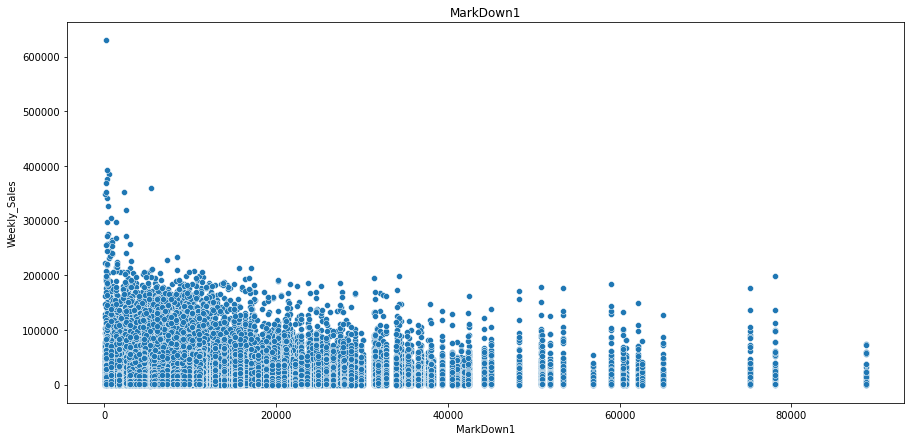

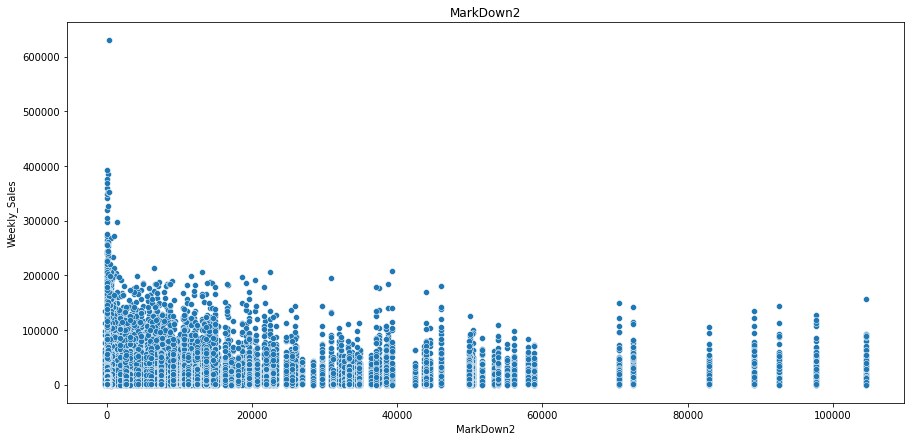

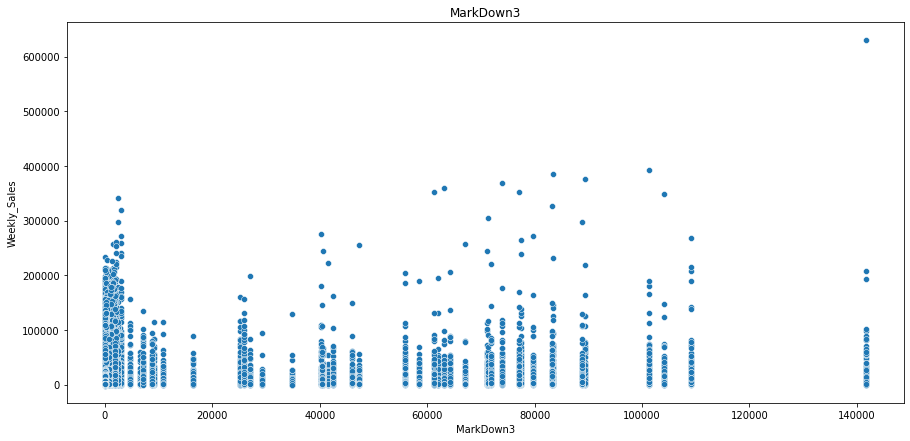

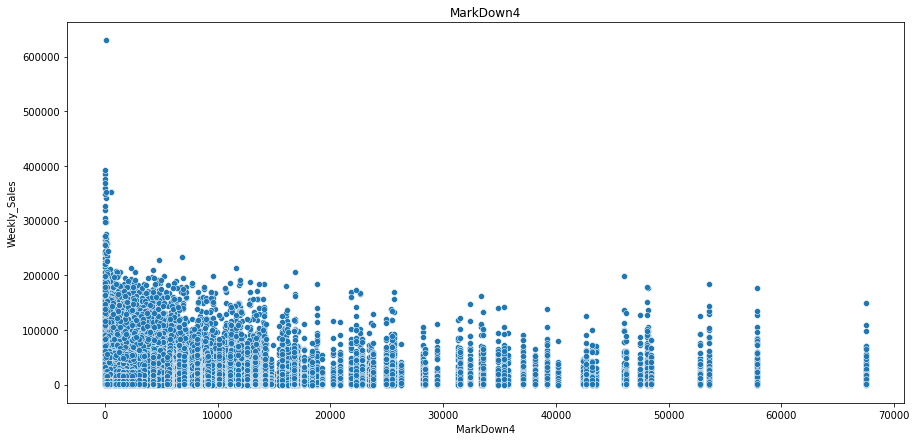

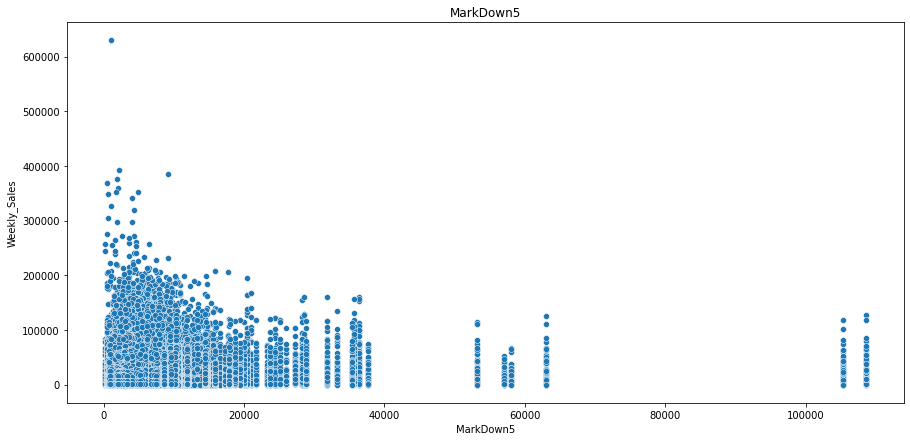

In [ ]:
cols_markdown = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]


for i in cols_markdown:
    plt.figure(figsize = (15, 7))
    sns.scatterplot(data = data_filtered, x = i, y = "Weekly_Sales")
    plt.title(i)
    plt.show()

Some distributions for each store changed:

* `MarkDown1` varies over the stores, with a higher peak for store 35.
* `MarkDown2` have higher values between stores 12 and 35.
* `MarkDown3` have higher values for store 27 and 24.
* `MarkDown4` have a variance of higher and lower values.
* `MarkDown5` contains a higher value for store 39.

### MarkDown vs Weekly Sales

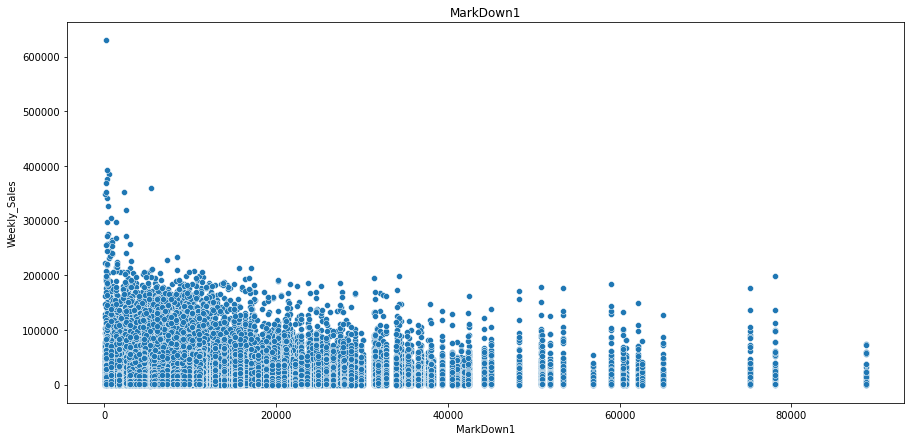

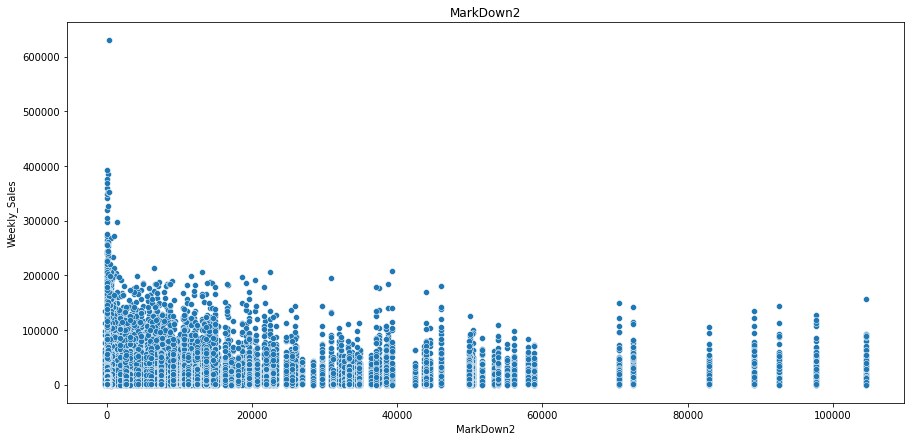

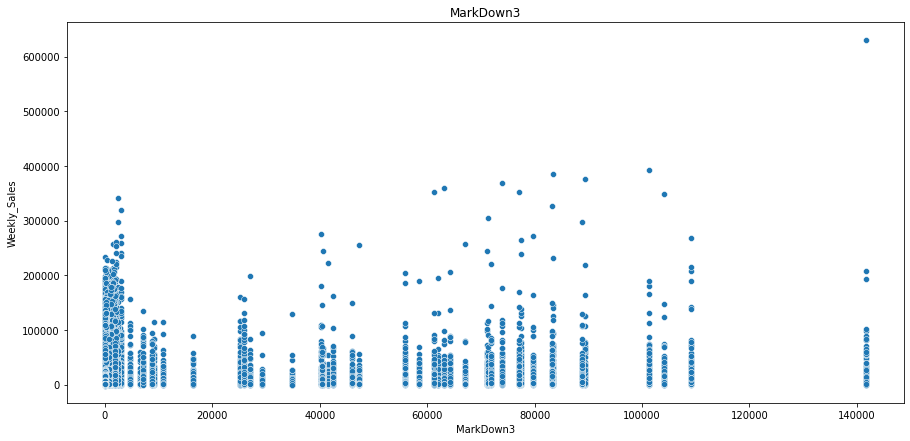

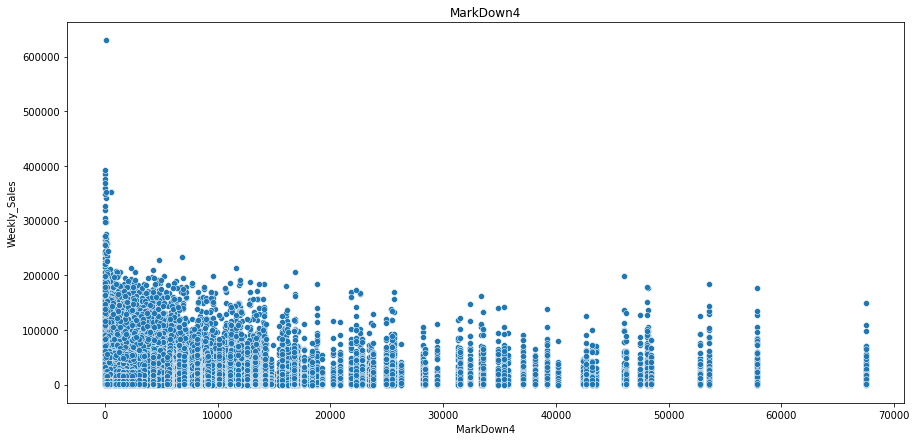

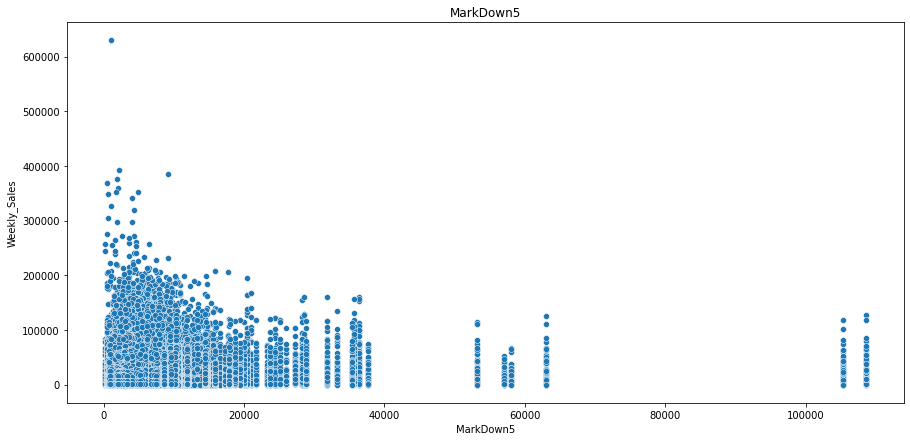

In [ ]:
cols_markdown = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]


for i in cols_markdown:
    plt.figure(figsize = (15, 7))
    sns.scatterplot(data = data_filtered, x = i, y = "Weekly_Sales")
    plt.title(i)
    plt.show()

Relatively except for `MarkDown3`, lower markdown numbers are linked to higher weekly sales.

### Weekly Sales vs Temperature

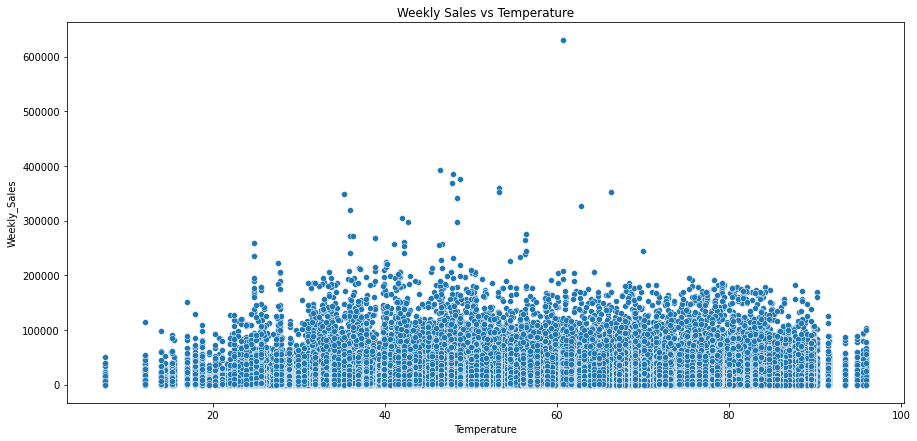

In [ ]:
plt.figure(figsize = (15, 7))
sns.scatterplot(data = data_filtered, x = "Temperature", y = "Weekly_Sales")
plt.title("Weekly Sales vs Temperature")
plt.show()

Sales are lower on very low and very high temperatures.

### MarkDown vs Temperature

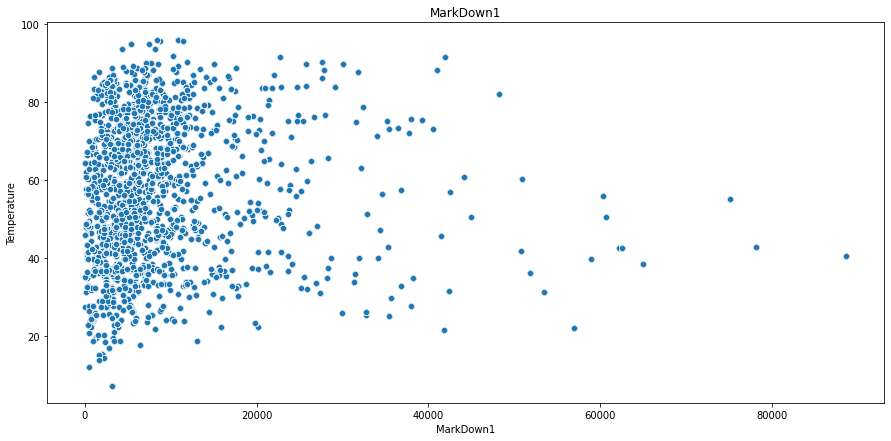

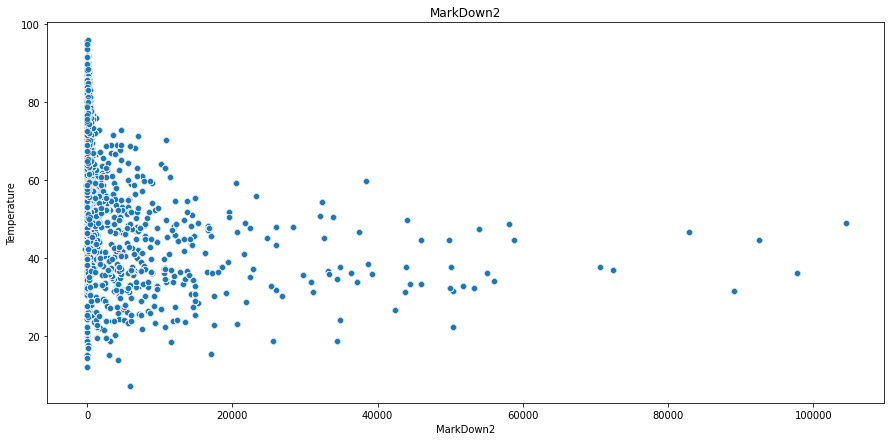

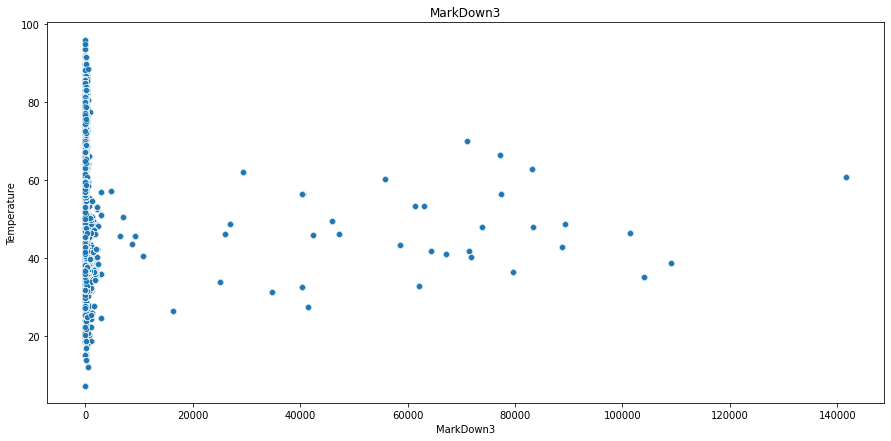

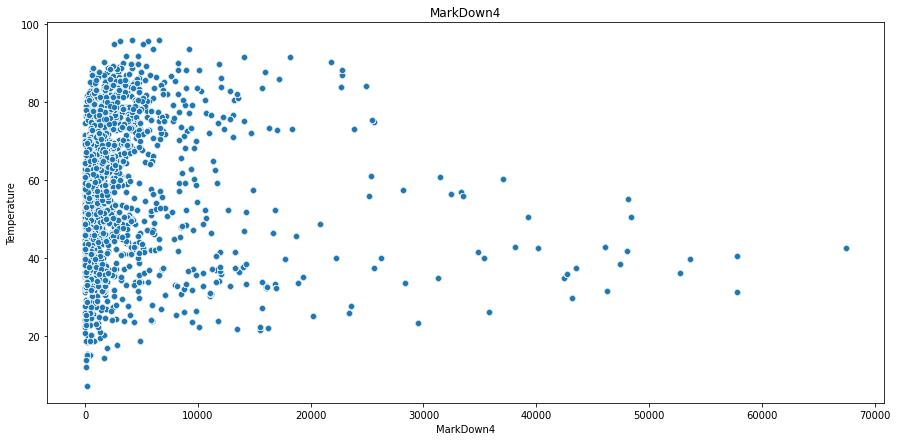

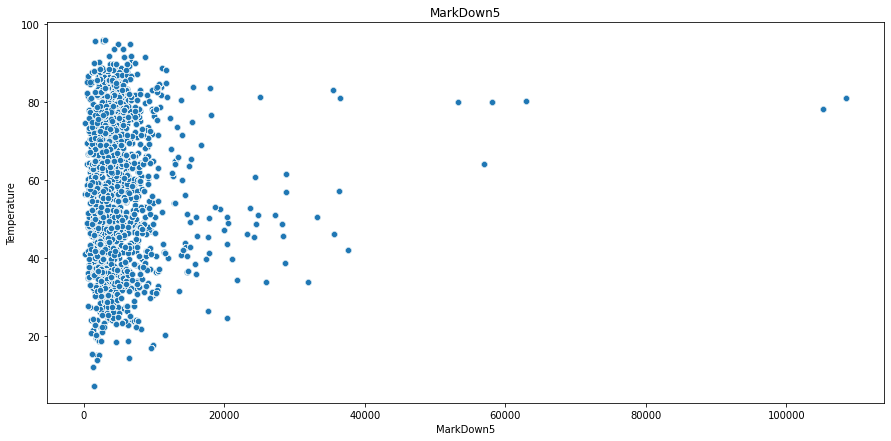

In [ ]:
for i in cols_markdown:
    plt.figure(figsize = (15, 7))
    sns.scatterplot(data = data_filtered, x = i, y = "Temperature")
    plt.title(i)
    plt.show()

### Weekly Sales vs Date

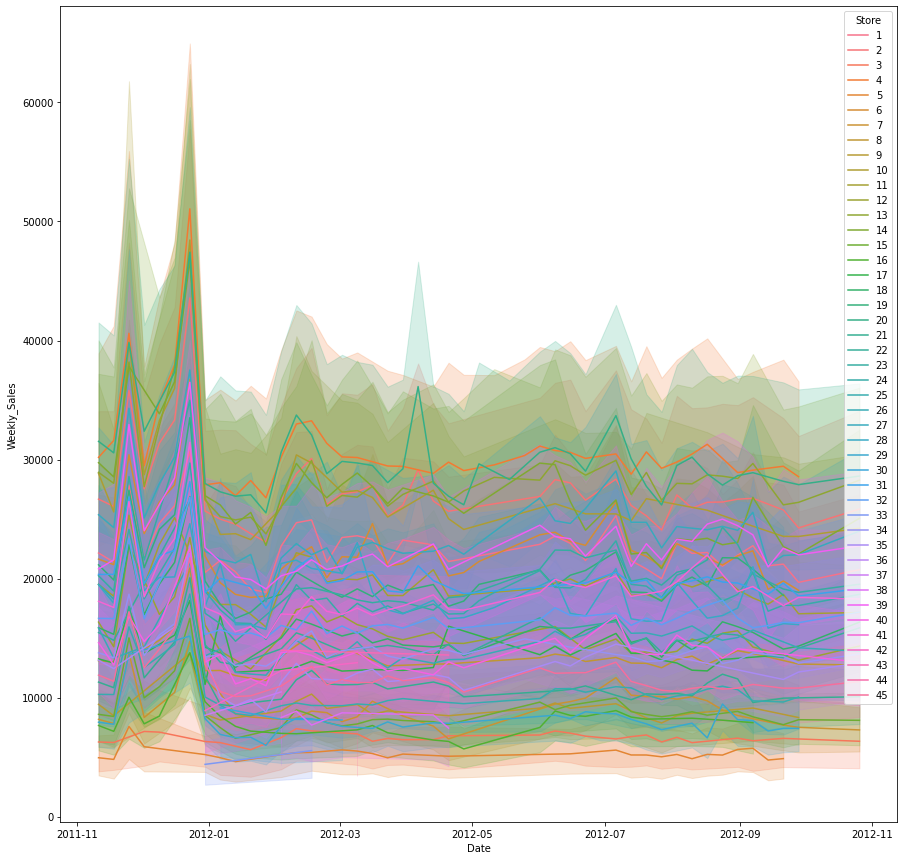

In [ ]:
data_filtered["Store"] = data_filtered["Store"].astype("category")

plt.figure(figsize = (15, 15))
sns.lineplot(data = data_filtered, x = "Date", y = "Weekly_Sales", hue = "Store");

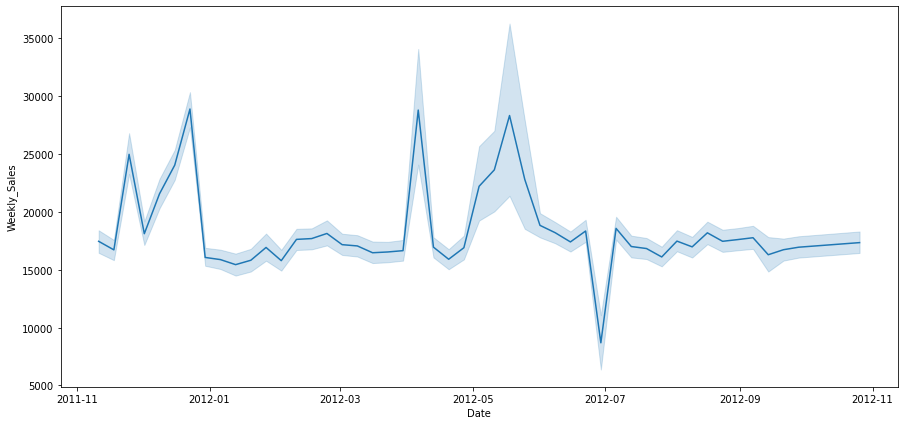

In [ ]:
plt.figure(figsize = (15, 7))
sns.lineplot(data = data_filtered, x = "Date", y = "Weekly_Sales");

### Markdown vs Date

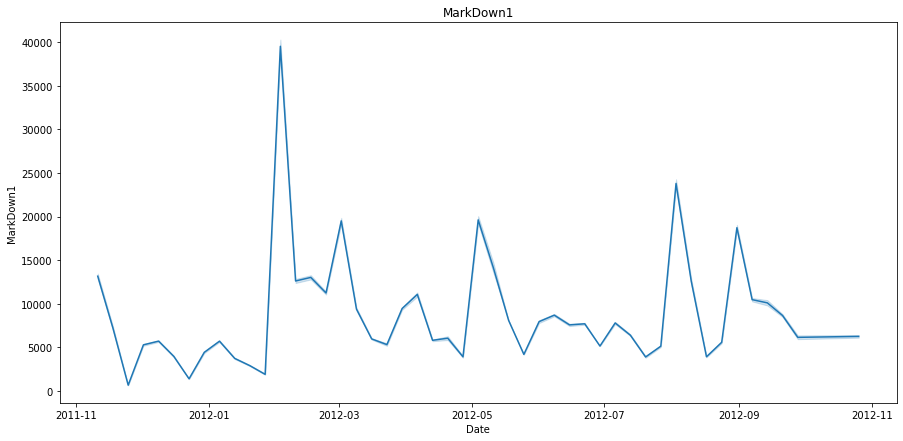

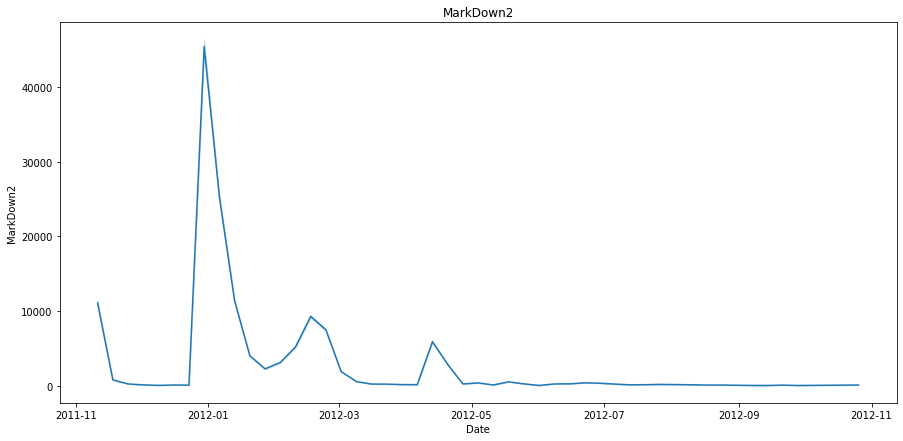

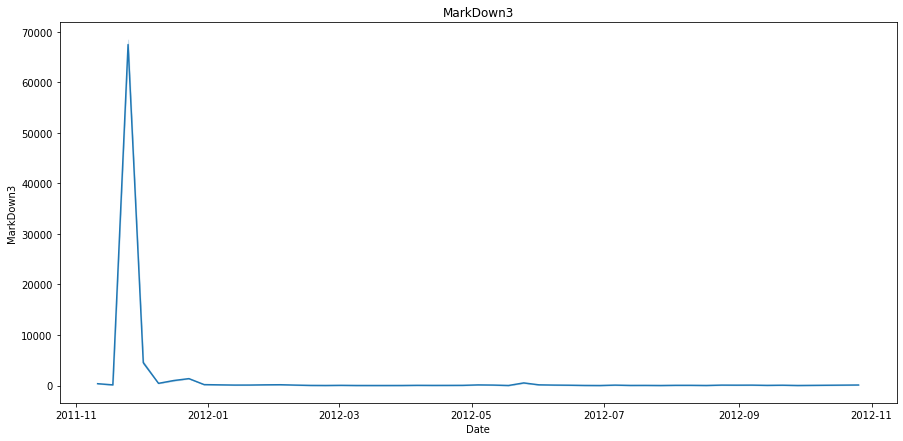

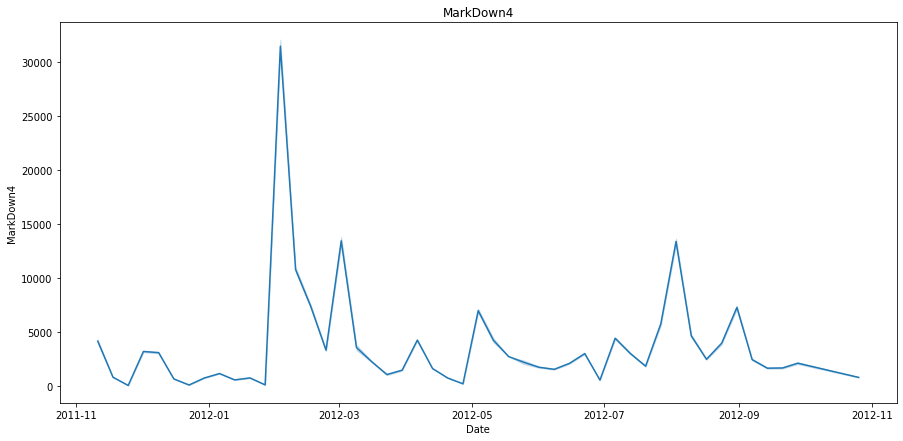

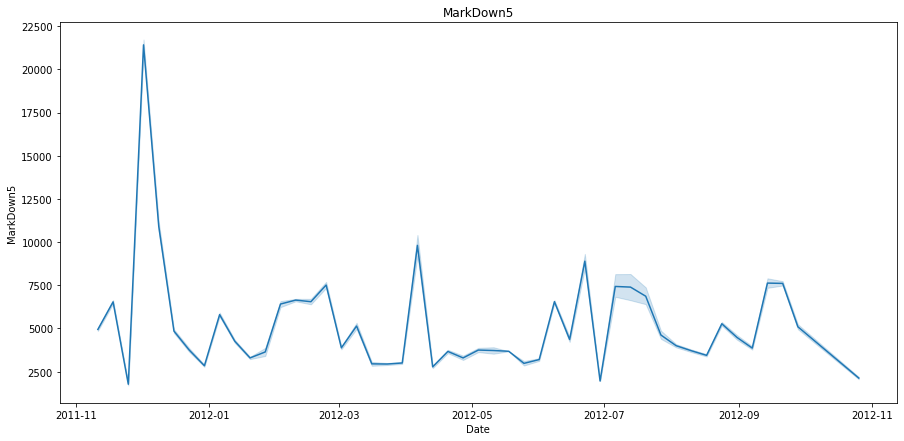

In [ ]:
for i in cols_markdown:
    plt.figure(figsize = (15, 7))
    sns.lineplot(data = data_filtered, x = "Date", y = i)
    plt.title(i)
    plt.show()

### Sales vs Unemployment

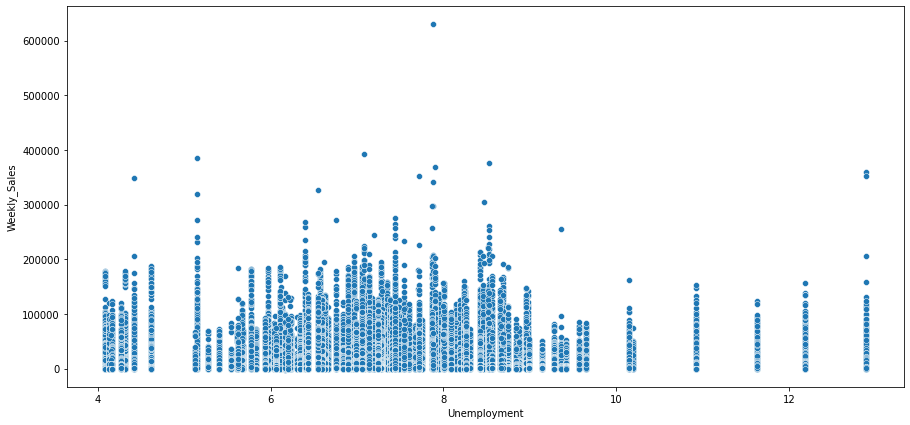

In [ ]:
plt.figure(figsize = (15, 7))
sns.scatterplot(data = data_filtered, x = "Unemployment", y = "Weekly_Sales");

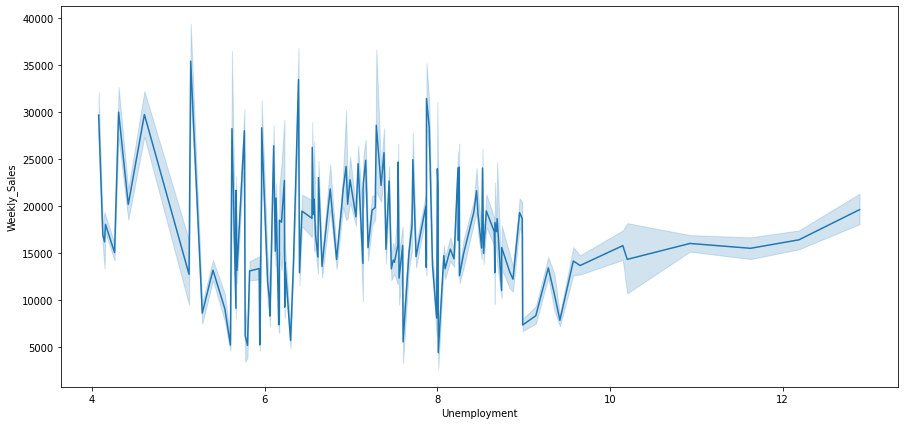

In [ ]:
plt.figure(figsize = (15, 7))
sns.lineplot(data = data_filtered, x = "Unemployment", y = "Weekly_Sales");

### Sales vs CPI

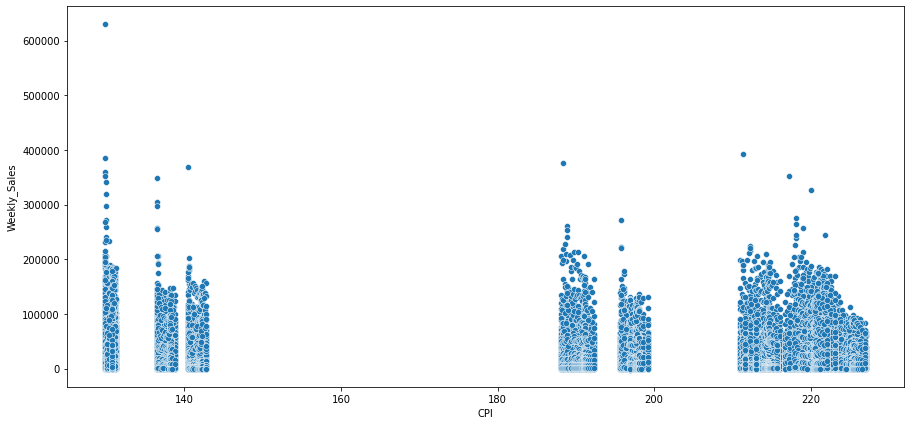

In [ ]:
plt.figure(figsize = (15, 7))
sns.scatterplot(data = data_filtered, x = "CPI", y = "Weekly_Sales");

### Sales vs Size

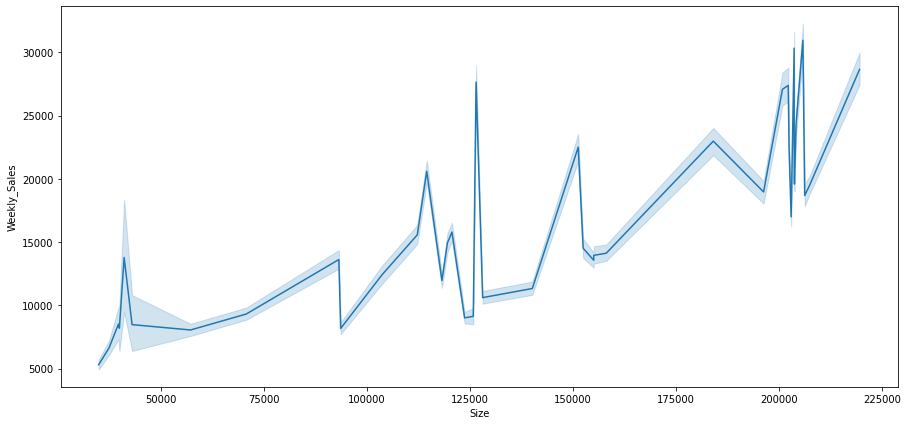

In [ ]:
plt.figure(figsize = (15, 7))
sns.lineplot(data = data_filtered, x = "Size", y = "Weekly_Sales");

### Sales vs Department

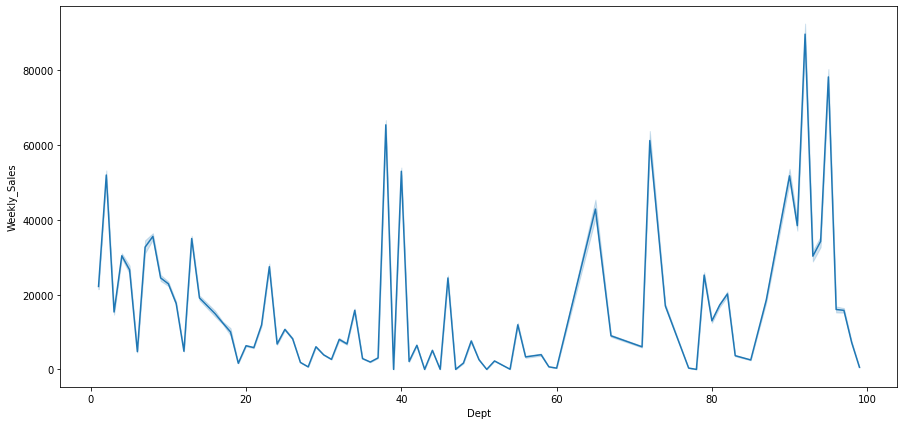

In [ ]:
plt.figure(figsize = (15, 7))
sns.lineplot(data = data_filtered, x = "Dept", y = "Weekly_Sales");

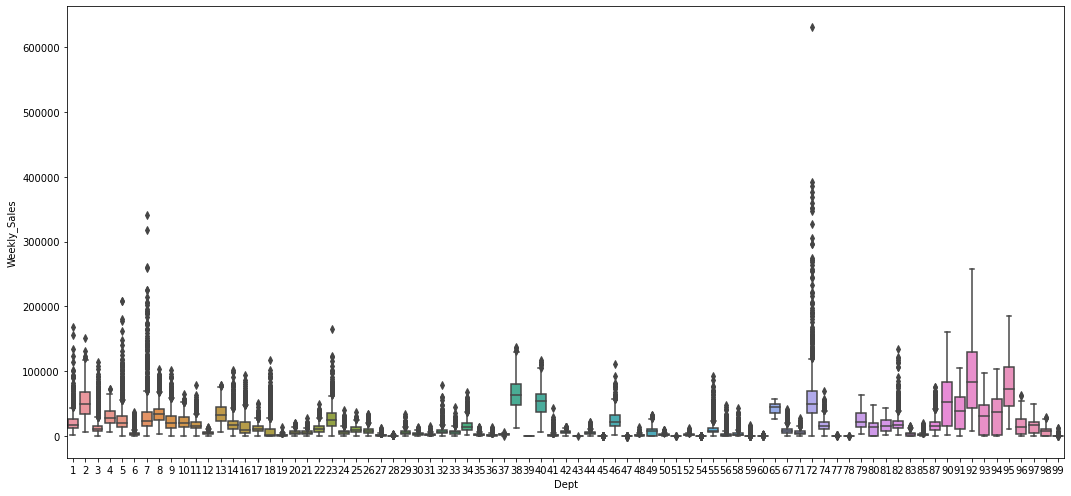

In [ ]:
plt.figure(figsize = (15, 7))
sns.boxplot(data = data_filtered, x = "Dept", y = "Weekly_Sales");
plt.tight_layout()

### Sales vs Year

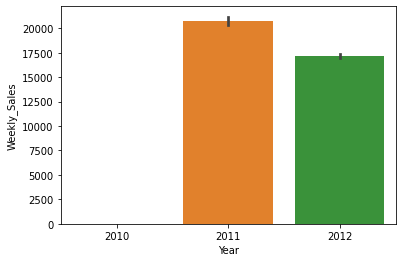

In [ ]:
sns.barplot(data = data_filtered, x = "Year", y = "Weekly_Sales");

## Sales vs Month

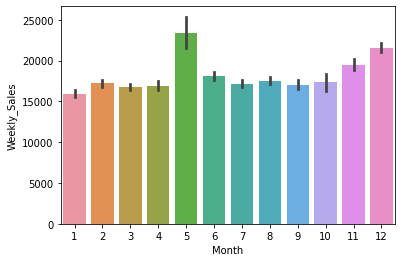

In [ ]:
sns.barplot(data = data_filtered, x = "Month", y = "Weekly_Sales");

## Multivariate

### Correlation Plot

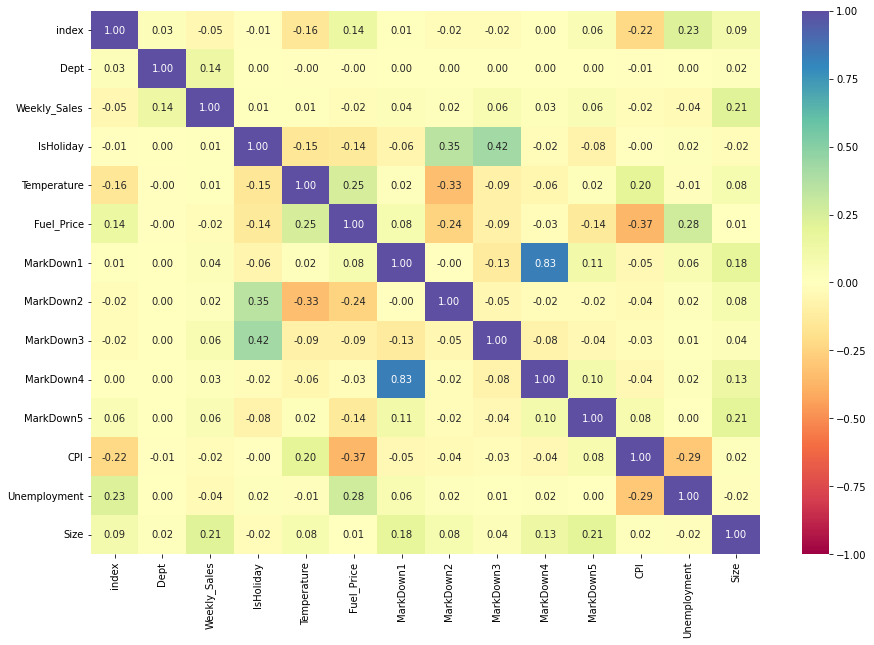

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(data = data_filtered.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "Spectral");

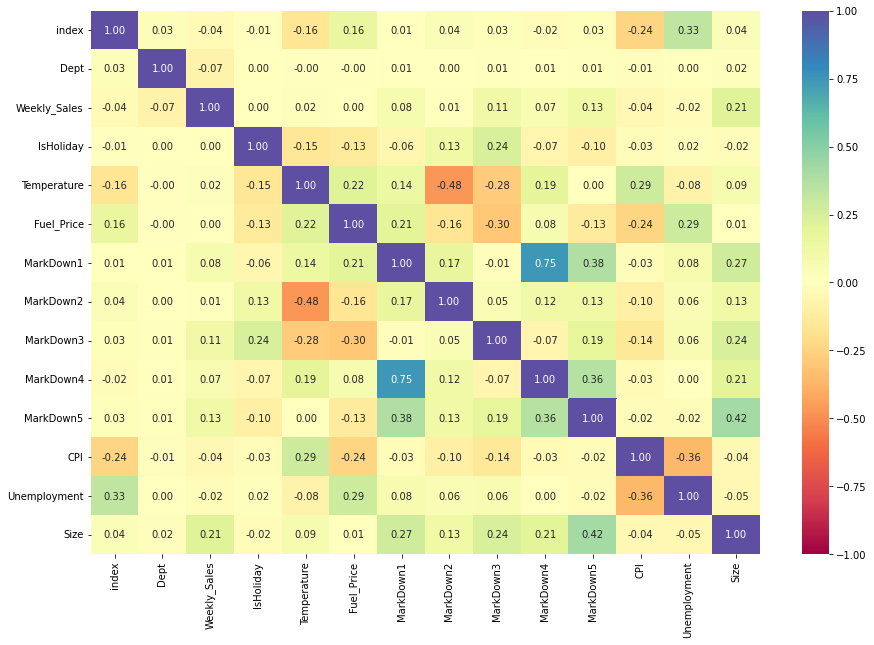

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(data = data_filtered.corr(method = "spearman"), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "Spectral");

### Pair Plot

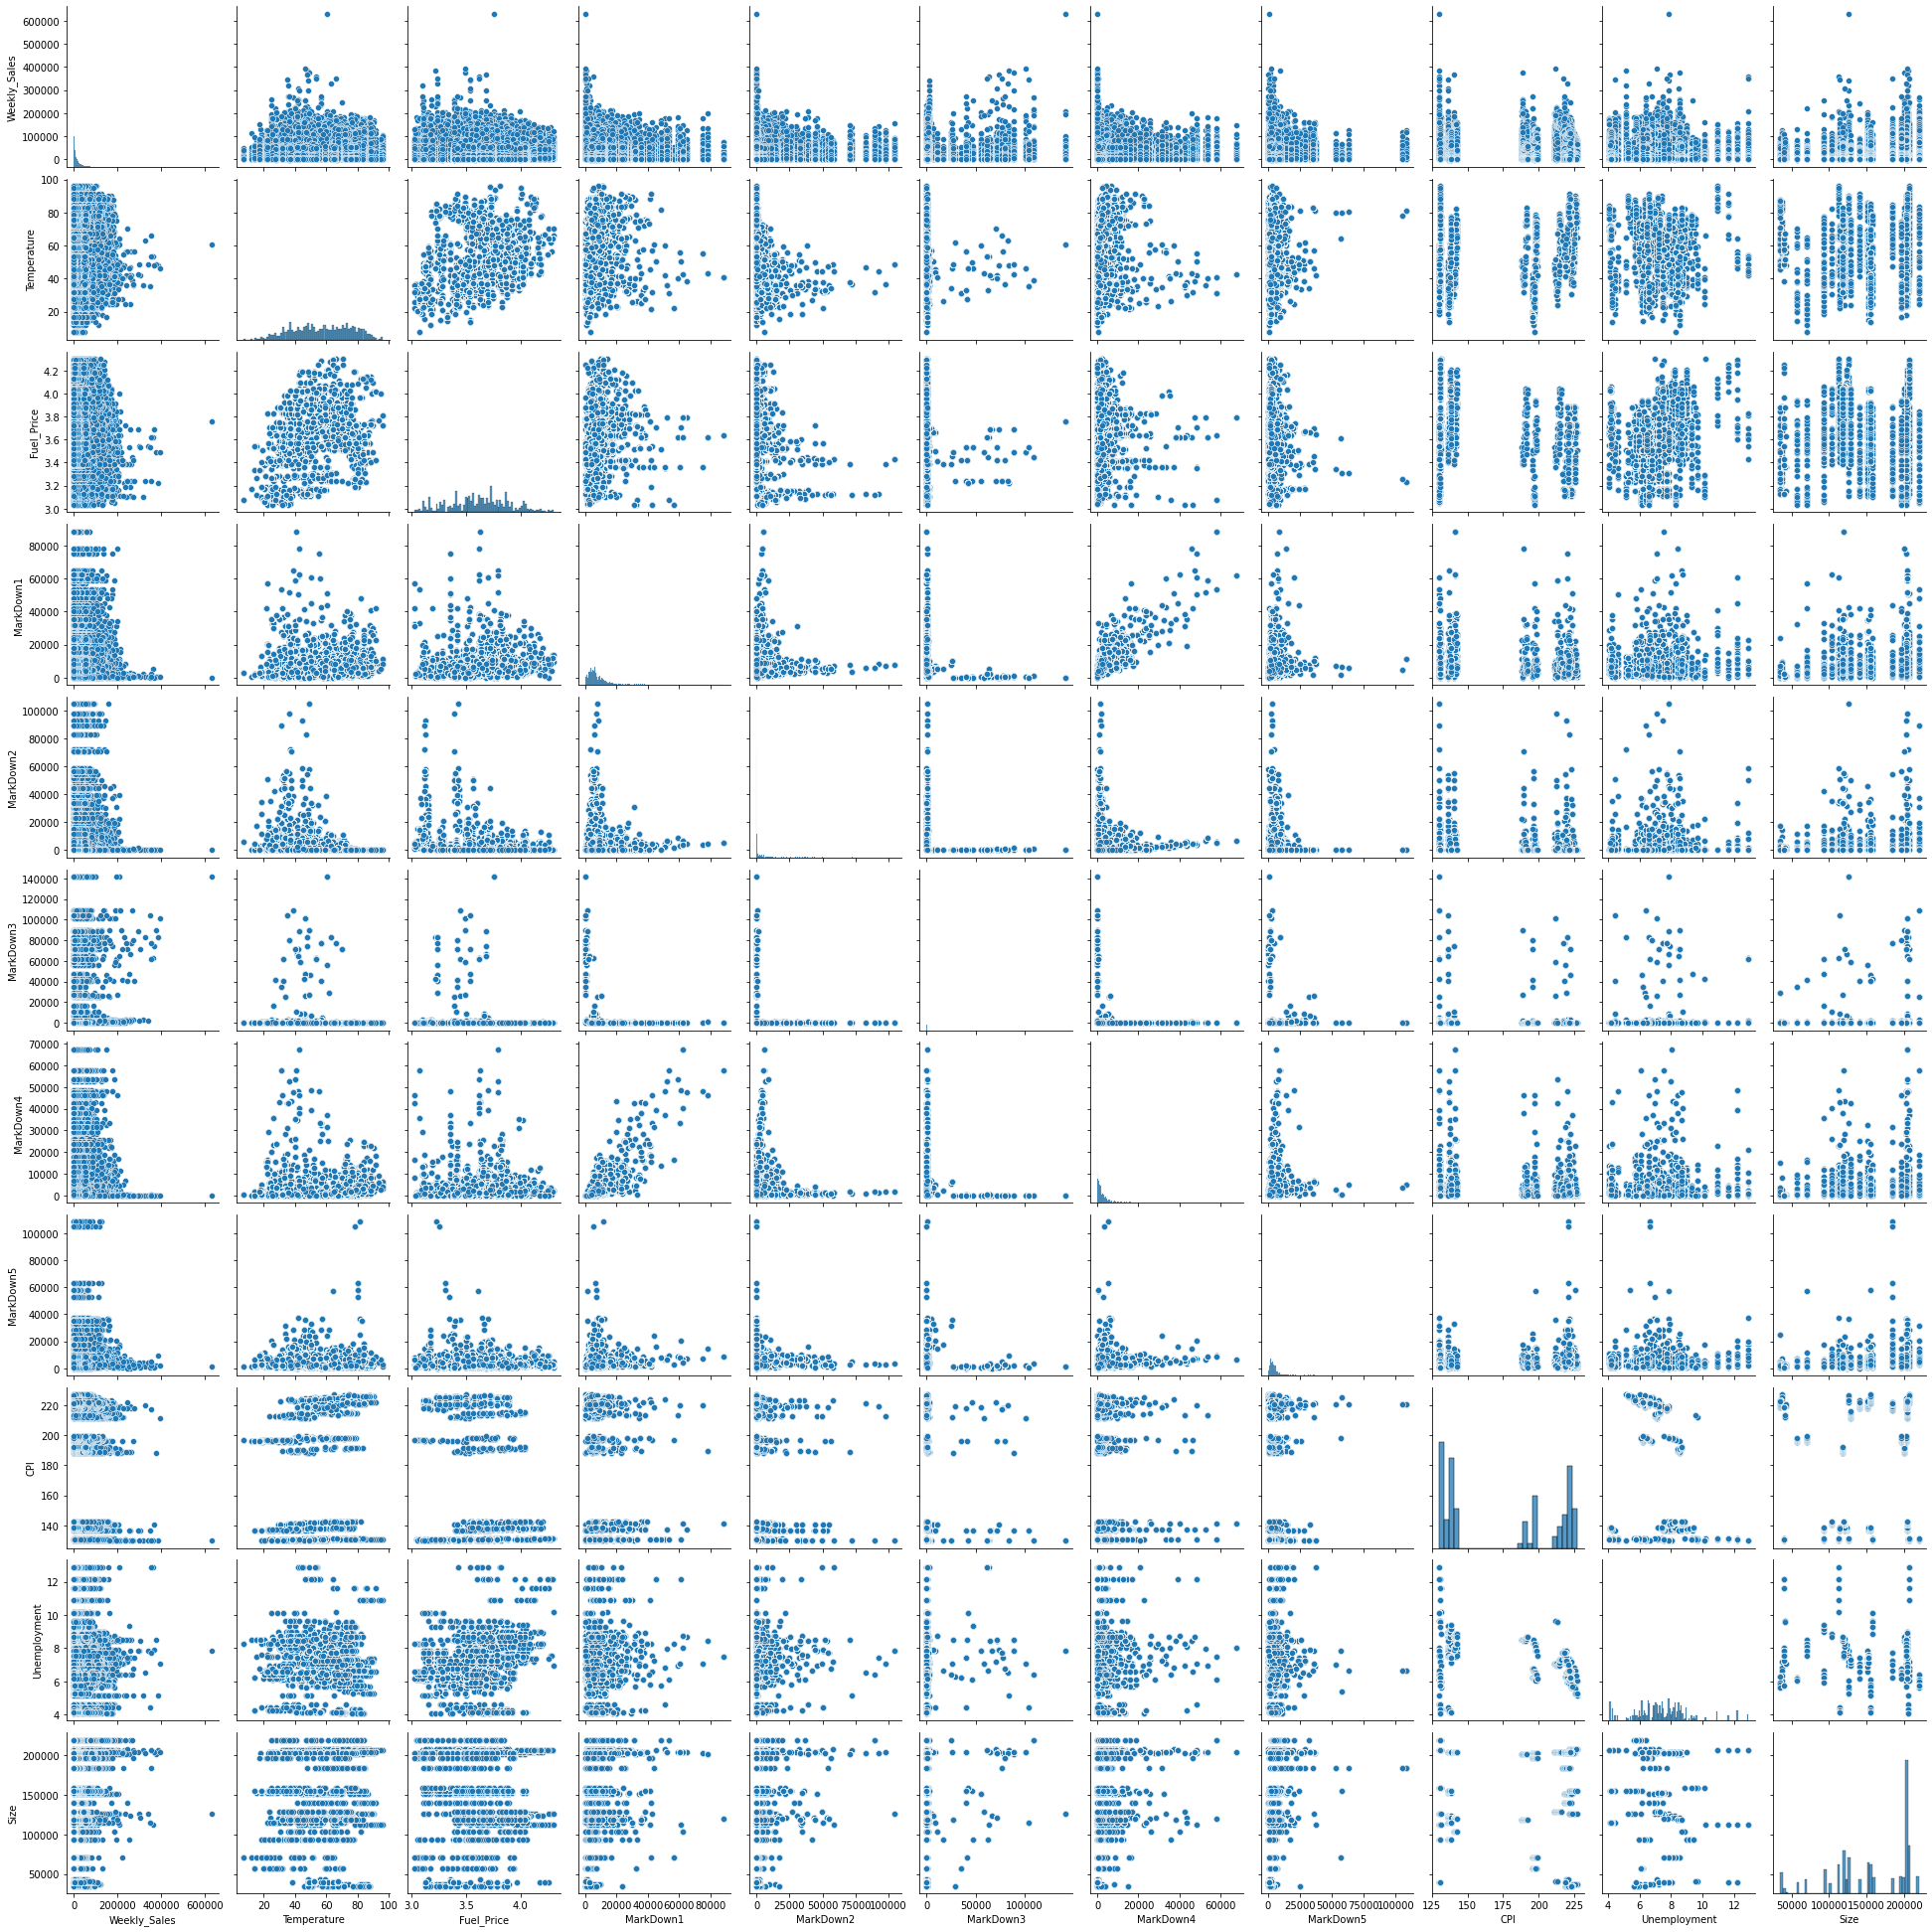

In [ ]:
sns.pairplot(data = data_filtered[cols_num])

## Data Transformation

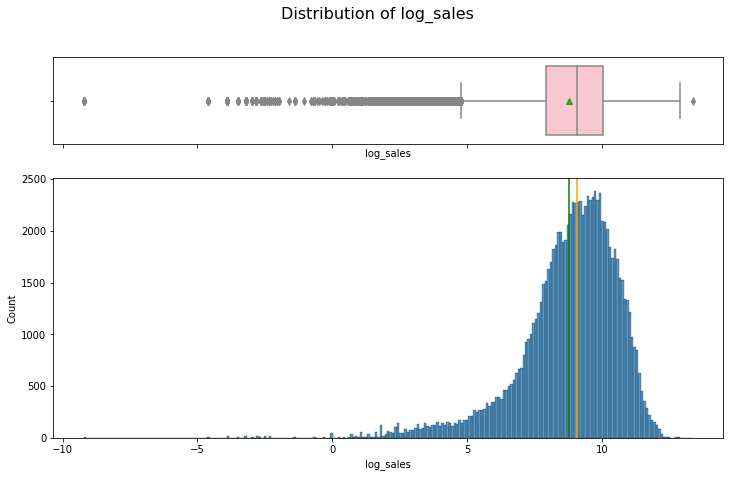

In [ ]:
data_filtered["log_sales"] = np.log(data_filtered["Weekly_Sales"] + 0.0001)

hist_box(data_filtered, "log_sales")

The transformed sales now have a distribution closer to normal, and it can be used for modeling (as feature or target).

### Log-Sales vs Date

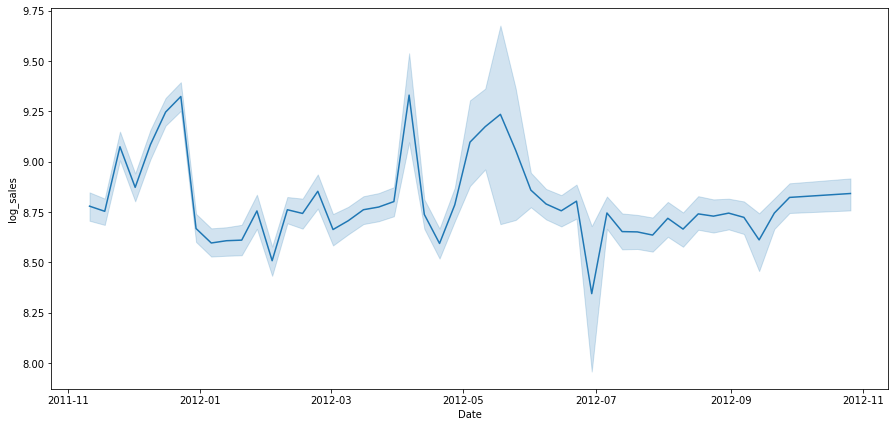

In [ ]:
plt.figure(figsize = (15, 7))
sns.lineplot(data = data_filtered, x = "Date", y = "log_sales");

After the log transformation, the interpretation is still the same as the original.

# Summary

Sales analysis data from anonymous stores.

### Data Cleaning

* No duplicated rows.
* Removed data rows containing NaNs in the MarkDowns columns.

### Data Augmentation and Transformation

* Split the date: year, month, week, and day.
* Took the log transformation of the Weekly_Sales.

### EDA

* Sales are higher in four holidays: Super Bowl, Labor Day, Thanksgiving, and Christmas.
* Each Markdown seems to be more focused in a specific holiday.
* Markdowns don't have great impact on sales, except during Christmas.
* Sales are lower in lower or higher temperatures.
* Sales are higher in May and December.
* More sales when unemployment rate is low.